<a href="https://colab.research.google.com/github/adlihs/instatXML/blob/main/Instat_%7C_Pass_Map_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mplsoccer
!pip install -U pandasql
!pip install highlight-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=aebc4e47eaf4966e33613209c0a66c560188cdeffbbb54301271a96ce3ee8b17
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Setup pandasql

In [2]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

## Import packages

In [3]:
import os, sys 
#to be able to interact with Google Drive's operating system
from google.colab import drive 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba,LinearSegmentedColormap
from urllib.request import urlopen
from PIL import Image
from mplsoccer import Pitch,VerticalPitch, FontManager, Sbopen, add_image,PyPizza
from highlight_text import HighlightText, ax_text, fig_text
import matplotlib.patheffects as path_effects
import re
import warnings

## Load fonts

In [5]:
import matplotlib as mpl
import matplotlib.font_manager as fm

#!mv /content/drive/MyDrive/fonts/Comfortaa-Bold.ttf /usr/share/fonts/truetype/

path = '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf' #'/usr/share/fonts/truetype/Oswald-Bold.ttf'
fontprop = fm.FontProperties(fname=path, size= 35)
game_det_fontprop = fm.FontProperties(fname=path, size=20)
title_det_fontprop = fm.FontProperties(fname=path, size=15)


## Load Instat data

In [6]:
tournament = input('Enter tournament (UNAFUT, U20 WWC,SwissLeague): ')

if tournament == 'UNAFUT':
  %cd '/content/drive/MyDrive/SIFUTCR'
  main_df = pd.read_parquet('UNAFUT.parquet')
  main_df.query("Acciones != 'Ataques posicionales'",inplace=True) 
  main_df['jugador'] = main_df['jugador'].str.strip()
elif tournament == 'U20 WWC':
  %cd '/content/drive/MyDrive/U20 WWC'
  main_df = pd.read_parquet('U20 WWC.parquet')
  main_df.query("Acciones != 'Ataques posicionales'",inplace=True) 
  main_df['jugador'] = main_df['jugador'].str.strip()
elif tournament == 'SwissLeague':
  %cd '/content/drive/My Drive/Suiza/Torneo'
  main_df = pd.read_parquet('SwissLeague.parquet')
  main_df.query("Acciones != 'Ataques posicionales'",inplace=True) 
  main_df['jugador'] = main_df['jugador'].str.strip()





main_df.head()

Enter tournament (UNAFUT, U20 WWC,SwissLeague): UNAFUT
/content/drive/MyDrive/SIFUTCR


,ID,start,end,pos_x,pos_y,Partido,camisa,jugador,Equipos,Acciones,...,nombre_torneo,equipo_casa,equipo_visita,marcador,goles_local,goles_visita,rival,marcador_casa,marcador_visita,detalle_marcador
1,2,4.050781,24.05,52.9,34.2,Guanacasteca-0-2-Herediano2,10,Yeltsin Tejeda,Herediano,Pases precisos,...,Apertura 2022,Guanacasteca,Herediano,0-2,0,2,Guanacasteca,0.0,0.0,0-0
4,5,7.320312,27.32,35.4,39.5,Guanacasteca-0-2-Herediano2,5,Ariel Roman Soto,Herediano,Pases precisos,...,Apertura 2022,Guanacasteca,Herediano,0-2,0,2,Guanacasteca,0.0,0.0,0-0
6,7,8.773438,28.77,61.9,19.0,Guanacasteca-0-2-Herediano2,4,Orlando Moises Galo Calderon,Herediano,Pases precisos,...,Apertura 2022,Guanacasteca,Herediano,0-2,0,2,Guanacasteca,0.0,0.0,0-0
8,9,9.921875,29.92,71.3,13.7,Guanacasteca-0-2-Herediano2,9,Anthony Daniel Contreras Enriquez,Herediano,Pases inefectivo,...,Apertura 2022,Guanacasteca,Herediano,0-2,0,2,Guanacasteca,0.0,0.0,0-0
9,11,21.250000,41.25,61.0,0.0,Guanacasteca-0-2-Herediano2,97,Rawy Jafet Rodriguez Osorio,Herediano,Pases precisos,...,Apertura 2022,Guanacasteca,Herediano,0-2,0,2,Guanacasteca,0.0,0.0,0-0


## Player images

### Function

In [7]:
def player_images(team,player):

  if team == 'Herediano':
    if player == 'Yeltsin Tejeda':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/Yeltsin Tejeda.png'
    elif player == 'Ariel Roman Soto':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/Ariel Roman Soto.png'
    elif player == 'Orlando Moises Galo Calderon':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/O. Galo.png'
    elif player == 'Anthony Daniel Contreras Enriquez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/A. Contreras.png'
    elif player == 'Rawy Jafet Rodriguez Osorio':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/R. Rodriguez.png'
    elif player == 'Juan Miguel Basulto Medina':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/M. Basulto.png'
    elif player == 'Douglas Andrey Lopez Araya':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/D. López.png'      
    elif player == 'Gerson Torres Barrantes':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/G. Torres.png'
    elif player == 'Diego Gonzales':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/Diego Gonzales.png'
    elif player == 'Esteban Alvarado Brown':
      player_image = ''
    elif player == 'Mynor Javier Escoe Miller':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/M. Escoe.png'
    elif player == 'Mauricio Jose Vargas':
      player_image = ''
    elif player == 'Jefferson Brenes Rojas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/J. Rojas.png' 
    elif player == 'John Jairo Ruiz':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/J. Ruiz.png'
    elif player == 'Geovanni Arturo Campos Villalobos':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/A. Campos.png'
    elif player == 'Luis Miguel Franco Zamora':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/L. Franco.png'
    elif player == 'Kenneth Gerardo Vargas Vargas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/K. Vargas.png'
    elif player == 'Enyel Alonso Alonso Escoe Mendez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/Enyel Alonso Escoe.png'
    elif player == 'Jewison Bennette':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/J. Bennette.png'     
    elif player == 'Kennedy Rocha':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/Kennedy Rocha.png'
    elif player == 'Waylon Dwayne Francis Box':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Heredia/W. Francis.png'
    elif player == 'Aaron Salazar Arias':
      player_image = ''         


  elif team == 'Guanacasteca':
    if player == 'Yeison Molina Ruiz':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/Yeison Molina Ruiz.png'
    elif player == 'Richard Anthony Steven Gutierrez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/R. Gutierrez.png'
    elif player == 'Mauricio Jose Vargas':
      player_image = ''
    elif player == 'Pedro Luis Leal Valencia':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/P. Leal.png' 
    elif player == 'Alejandro Jesus Bran Flores':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/A. Bran.png'
    elif player == 'Joseph Bolanos Valverde':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/J. Bolanos.png'
    elif player == 'Haxzel Quiros':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/Haxel Quiros Cruz.png'     
    elif player == 'Ariel Isaac Arauz Artola':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/A. Arauz.png'
    elif player == 'Jedwin Lester':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/J. Lester.png'
    elif player == 'Dayron Miguel Sanchez Briceno':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/D. Sanchez.png'
    elif player == 'Nicolas Andre Azofeifa':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/N. Azofeifa.png'
    elif player == 'Jose Martin Leiton Rodriguez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/J. Leiton.png'
    elif player == 'Gederick Thorpe':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/Gederick Thorpe.png'
    elif player == 'Samuel Andres Roman Castillo':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/S. Castillo.png'
    elif player == 'Jason Telemaco Ingram Oporta':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/J. Ingram.png'
    elif player == 'Jairo Alexander Monge Ruiz':
      player_image = ''
    elif player == 'Raheem Giusseppe Cole Martinez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/R. Cole.png'
    elif player == 'Shawn Johnson Edwards':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/S. Johnson.png'
    elif player == 'Diego Armando Velasquez Fonseca':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/D. Velasquez.png'     
    elif player == 'Estivel Moreira':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/Estivel Moreira.png'
    elif player == 'Sergio Elias Bareiro Cardozo':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/S. Bareiro.png'
    elif player == 'Brandon Aguilera Zamora':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guanacasteca/Brandon Aguilera.png' 

  elif team == 'Alajuelense':
    if player == 'Carlos Andrei Mora Montoya':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/C. Mora.png'
    elif player == 'Bryan Ruiz':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/Bryan Ruiz.png'
    elif player == 'Ian Elijah Lawrence Escoe':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/Ian Lawrence Escoe.png'
    elif player == 'Alex Lopez Rodrigues':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/Alex Lopes Rodrigues.png' 
    elif player == 'Celso Borges':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/Celso Borges.png'
    elif player == 'Aaron Rene Suarez Zuniga':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/A. Suarez.png'
    elif player == 'Freddy Elias Gondola Smith':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/F. Gondola.png'     
    elif player == 'Alexis Yohaslin Gamboa Rojas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/A. Gamboa.png'
    elif player == 'Miguel Andres Aju Alfaro':
      player_image = ''
    elif player == 'Ian Rey Smith Quiros':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/Ian Smith.png'
    elif player == 'Giancarlo Gonzalez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/Giancarlo Gonzalez.png'
    elif player == 'Doryan Jovanny Rodriguez Soto':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/D. Rodriguez.png'
    elif player == 'Jose Miguel Cubero Loria':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/J. Cubero.png'
    elif player == 'Bernald Alfaro Alfaro':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/B. Alfaro.png'
    elif player == 'Bryan Felix':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/Bryan Felix.png'
    elif player == 'Yael Andres Lopez Fuentes':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/Y. Lopez.png'
    elif player == 'Aubrey Rudolph Robert David':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/A. David.png'
    elif player == 'Rolando Manrique Blackburn Ortega':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/R. Blackburn.png'
    elif player == 'Johan Venegas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/LDA/Johan Venegas.png'     
    

  elif team == 'Santos':
    if player == 'Jhamir Kareem Ordain Alexander':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/J. Ordian.png'
    elif player == 'Luis Jose Hernandez Paniagua':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/L. Hernandez.png'
    elif player == 'Armando Ruiz Cole':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/Armando Ruiz Cole.png'
    elif player == 'Mauricio Jesus Salas Vargas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/M. Jesus.png' 
    elif player == 'Daniel Arturo Cambronero Solano':
      player_image = ''
    elif player == 'Starling Matarrita Gonzalez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/S. Matarrita.png'
    elif player == 'Denilson Mason Gutierrez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/D. Mason.png'      
    elif player == 'Pablo Esteban Fonseca Brenes':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/P. Fonseca.png'
    elif player == 'Chevone Omelli Marsh':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/Chevone Omelli Marsh.png'
    elif player == 'Edder Gerardo Solorzano Leal':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/E. Solorzano.png'
    elif player == 'Sebastian Castro':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/Sebastian Castro.png'
    elif player == 'Frank Andres Zamora Garcia':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/F. Zamora.png'
    elif player == 'Brayton Lewis':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/Brayton Lewis.png' 
    elif player == 'Luis Alejandro Perez Castillo':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/L. Perez.png'
    elif player == 'Kendrick Enriquez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/Kendrick Enriquez.png'
    elif player == 'Isacc Salas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/Isaac Salas.png'
    elif player == 'Julio Eduardo Barragan Castillo':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/J. Barragan.png'
    elif player == 'Adan Alberto Climaco Calderon':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/A. Climaco.png'
    elif player == 'Giovanni Pierre Clunie Asenjo':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/G. Clunie.png'     
    elif player == 'Michael Vinicio Barquero Abarca':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/M. Barquero.png'
    elif player == 'Osvaldo Roberto Rodriguez Flores':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Santos/O. Rodriguez.png'
    elif player == '':
      player_image = '' 

  elif team == 'Saprissa':
    if player == 'Andy Reyes':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/A. Reyes.png'
    elif player == 'David Guzman':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/David Guzman.png'
    elif player == 'Kendall Waston':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/Kendall Watson.png'
    elif player == 'Mariano Nestor Torres':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/M. Torres.png' 
    elif player == 'Walter Cortes':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/Walter Cortes.png'
    elif player == 'Aaron Moises Cruz Esquivel':
      player_image = ''
    elif player == 'Pablo Cesar Arboine Carmona':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/P. Arboine.png'     
    elif player == 'Gerald Taylor':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/Gerald Taylor.png'
    elif player == 'Alvaro Jose Zamora Mata':
      player_image = ''
    elif player == 'Youstin Delfin Salas Gomez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/Y. Salas.png'
    elif player == 'Christian Bolanos':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/Christian Bolanos.png'
    elif player == 'Ariel Rodriguez Araya':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/A. Rodriguez.png'
    elif player == 'Ryan Bolanos Davis':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/Ryan Bolanos Davis.png' 
    elif player == 'Marvin Jesus Angulo Borbon':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/M. Angulo.png'
    elif player == 'Carlos Arturo Villegas Retana':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/C. Villegas.png'
    elif player == 'Jaylon Jahi Hadden Scarlett':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/J. Hadden.png'
    elif player == 'Orlando Alexis Sinclair Hernandez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/O. Sinclair.png'
    elif player == 'Ricardo Jose Blanco Mora':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/R. Blanco.png'
    elif player == 'Johel Fabricio Aleman Gaitan':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/F. Aleman.png'     
    elif player == 'Javon Romario East':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/Javon East.png'
    elif player == 'Luis Javier Paradela Diaz':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/Luis Paradela.png'
    elif player == 'Fidel Escobar':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Saprissa/Fidel Escobar.png' 

  elif team == 'Perez Zeledon':
    if player == 'Chistian Antonio Reyes Aleman':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/C. Reyes.png'
    elif player == 'Luis Carlos Barrantes Campos':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/L. Barrantes.png'
    elif player == 'Randy Alexander Taylor Dosman':
      player_image = ''
    elif player == 'Henrique Moura':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/Henrique Moura.png' 
    elif player == 'Jeaustine Alonso Monge Calderon':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/J. Monge.png'
    elif player == 'Guillermo Daniel Alan Villalobos':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/G. Alan.png'
    elif player == 'Mauricio de Jesus Nunez Morales':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/M. Nunez.png'     
    elif player == 'Manuel Moran Velasquez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/M. Moran.png'
    elif player == 'Keral Yanfer Rios Castillo':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/Keral Yanfer Rios Castillo.png'
    elif player == 'Axel Mauriel Amador Rojas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/A. Amador.png'
    elif player == 'Joshua Parra Mesen':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/Joshua Parra Mesen.png'
    elif player == 'Gabriel Fernando Leiva Rojas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/G. Leiva.png'
    elif player == 'Luis Stewart Perez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/L. Perez.png' 
    elif player == 'Guillermo Villalobos Alfaro':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/G. Villalobos.png'
    elif player == 'Joshua Navarro Sandi':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/Joshua Navarro Sandi.png'
    elif player == 'Jose Eduardo Sosa Centeno':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/J. Sosa.png'
    elif player == 'Anthony Emanuel Mata Flores':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/A. Mata.png'
    elif player == 'Jose Arturo Tello Salas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/PZ/J. Tello.png'

  elif team == 'San Carlos':
    if player == 'Jonathan Andres McDonald Porras':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/J. McDonald.png'
    elif player == 'Wilmer Jesus Azofeifa Valverde':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/W. Azofeifa.png'
    elif player == 'Marcos Julian Mena Rojas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/M. Mena.png'
    elif player == 'Kadeem Cole Martinez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/Kadeem Cole.png'
    elif player == 'Yurguin Roman Alfaro':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/Y. Roman.png'
    elif player == 'Christian Alonso Martinez Mena':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/Christian Martinez.png'
    elif player == 'Geison Castro':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/Geison Castro.png'      
    elif player == 'Juan Perez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/Juan Perez Rodriguez.png'
    elif player == 'Carlos Martinez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/Carlos Martinez.png'
    elif player == 'Yosel Piedra Guillen':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/Yosel Piedra Guillen.png'
    elif player == 'Suhander Manuel Zuniga Cordero':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/Z. Zuniga.png'
    elif player == 'Luis Fabian Arroyo':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/Luis Fabian Arroyo.png'
    elif player == 'Kevin Martinec Fajardo Martinez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/K. Fajardo.png' 
    elif player == 'Rachid Enrique Chirino Serrano':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/Rachid Chirino.png'
    elif player == 'Roberto Jose Cordoba Duran':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/R. Cordova.png'
    elif player == 'Gustavo Adolfo Mendez Chavez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/G. Mendez.png'
    elif player == 'Antonio Ignacio Torres Carrillo':
      player_image = ''
    elif player == 'Jefry Antonio Valverde Rojas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/San Carlos/J. Valverde.png'
    

  elif team == 'Puntarenas':
    if player == 'Yoserth Hernandez Loria':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/Y. Hernandez.png'
    elif player == 'Jurguens Josafat Montenegro Vallejo':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/J. Montenegro.png'
    elif player == 'Daniel Alberto Quiros Perez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/D. Quiros.png'
    elif player == 'Kevin Alberto Sancho Ramos':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/K. Sancho.png' 
    elif player == 'Anthony Hernandez Gonzalez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/Anthony Hernandez Gonzales.png'
    elif player == 'Kliver Gomez Salas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/Kliver Gomez Salas.png'
    elif player == 'Jemarck Hernandez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/Jemarck Hernandez.png'     
    elif player == 'Kevin Vega':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/Kevin Vega.png'
    elif player == 'Jhonny Delroy Gordon Benwell':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/J. Gordon.png'
    elif player == 'Asdrubal Enrique Gibbons Hidalgo':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/A. Gibbons.png'
    elif player == 'Rodrigo Garita Valverde':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/R. Garita.png'
    elif player == 'William Alban Fernandez Gonzalez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/W. Fernandez.png'
    elif player == 'Carlos Monge Guadamuz':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/Carlos Monge Guadamuz.png'
    elif player == 'Steven Andrey Williams Barnett':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/S. Williams.png'
    elif player == 'Yonaiker Samir Mora Gonzalez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/Y. Mora.png'
    elif player == 'Greivin Mendez Venegas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/G. Mendez.png' 
    elif player == 'Krisler Villalobos Chavarria':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Puntarenas/Krisler Villalobos Chavarria.png'
    

  elif team == 'Mun. Grecia':
    if player == 'Luis Rodriguez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/Luis Rodriguez.png'
    elif player == 'Esteban Ramirez Segnini':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/E. Ramirez.png'
    elif player == 'Jean Carlo Aguero Duarte':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/J. Aguero.png'
    elif player == 'Matthew Bolanos Garcia':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/M. Bolanos.png' 
    elif player == 'Roan Roberto Wilson Gordon':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/R. Wilson.png'
    elif player == 'Jean Carlos Sanchez Gutierrez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/J. Sanchez.png'
    elif player == 'Esteban Eduardo Rodriguez Ballestero':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/E. Rodriguez.png'     
    elif player == 'Jordy Jafeth Evans Solano':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/Jordy Evans.png'
    elif player == 'Jairo Alberto Arrieta Obando':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/J. Arrieta.png'
    elif player == 'Reimond Ademar Salas Gomez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/R. Salas.png'
    elif player == 'Johan Josue Bonilla Calderon':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/J. Bonilla.png'
    elif player == 'Bradley Rodriguez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/Bradley Rodriguez.png'
    elif player == 'Paulo Mendez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/P. Mendez.png' 
    elif player == 'Osvaldo Alonso Barrantes Segura':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/O. Barrantes.png'
    elif player == 'Lucien Marcel Galtier':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Grecia/L. Galtier.png'
    

  elif team == 'Cartagines':
    if player == 'Jose Luis Quiros':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/Jose Luis Quiros.png'
    elif player == 'Dylan Armando Flores Knowles':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/D. Flores.png'
    elif player == 'Jose Gabriel Vargas Barrantes':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/J. Vargas.png'
    elif player == 'Allen Esteban Guevara Zuniga':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/A. Guevara.png' 
    elif player == 'Victor Josue Murillo Villegas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/V. Murillo.png'
    elif player == 'Carlos Luis Barahona Jimenez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/C. Barahona.png'
    elif player == 'Diego Andres Sanchez Corrales':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/D. Sanchez.png'      
    elif player == 'Luis Ronaldo Araya Hernandez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/R. Araya.png'
    elif player == 'Marcel Hernandez Campanioni':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/M. Hernandez.png'
    elif player == 'Kevin Andres Briceno Toruno':
      player_image = ''
    elif player == 'Jeikel Francisco Venegas Mc Carthy':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/J. Venegas.png'
    elif player == 'Byron Yamil Bonilla Martinez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/Byron Bonilla Martinez.png'
    elif player == 'Brandon Bonilla Zarate':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/B. Bonilla.png'
    elif player == 'Justin Ricardo Carrillo Garcia':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/Justin Ricardo Carrillo.png'
    elif player == 'Kevin Espinoza':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/Kevin Espinoza.png'
    elif player == 'Daniel Alonso Chacon Salas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/Daniel Chacon.png' 
    elif player == 'Kenneth Cerdas Barrantes':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Cartago/K. Cerdas.png'
    

  elif team == 'Guadalupe':
    if player == 'Jostin Akeem Daly Cordero':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/J. Daly.png'
    elif player == 'Eduardo Luis Juarez Viales':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/E. Juarez.png'
    elif player == 'Jorkaeff Mauricio Azofeifa':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/J. Azofeifa.png'
    elif player == 'Jesus Adan Mejia Castro':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/J. Mejia.png' 
    elif player == 'Nestor William Monge Guevara':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/N. Monge.png'
    elif player == 'Jossimar Jesus Pemberton Segura':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/J. Pemberton.png'
    elif player == 'Diego Alonso Estrada Valverde':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/D. Estrada.png'      
    elif player == 'Junior Antonio Delgado Solis':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/J. Delgado.png'
    elif player == 'Fabrizio Ramirez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/Fabrizio Ramirez.png'
    elif player == 'Creichel Perez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/Creichel Perez.png' 
    elif player == 'Aaron Gerardo Murillo Fonseca':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/A. Murillo.png'
    elif player == 'Royner Andrey Rojas Dinarte':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/R. Rojas.png'
    elif player == 'Rene Miranda Yubank':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/Rene Miranda Yubank.png'
    elif player == 'Julen Cordero Gonzalez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/J. Cordero.png'
    elif player == 'Andres Gomez Rodriguez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/A. Gomez.png'
    elif player == 'Andrey Gerardo Mora Matarrita':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/A. Mora.png'
    elif player == 'Dario Alejandro Delgado Mora':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/D. Delgado.png'
    elif player == 'Darryl Yorel Araya Samuels':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/D. Araya.png'
    elif player == 'Marcos Josue Meneses Salazar':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/J. Meneses.png'      
    elif player == 'Keyshwen Arboine':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Guadalupe/K. Airbone.png'


  elif team == 'Sporting FC':
    if player == 'Roy Miller Hernandez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/Roy Miller.png'
    elif player == 'Dennis Esteban Castillo Romero':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/D. Castillo.png'
    elif player == 'Juan Diego Madrigal Espinoza':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/J. Madrigal.png'
    elif player == 'Luis Alejandro Flores Cordero':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/L. Flores.png' 
    elif player == 'Bryan Isaias Vega Chaves':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/B. Vega.png'
    elif player == 'Jose Guillermo Mora Campos':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/J. Mora.png'
    elif player == 'Anthony Lopez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/A. Lopez.png'     
    elif player == 'Cristopher Meneses Barrantes':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/C. Meneses.png'
    elif player == 'Jaikel Medina Scarlett':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/J. Medina.png'
    elif player == 'Luis Torres Brenes':
      player_image = ''
    elif player == 'Brian Aaron Martinez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/Brian Aaron Martinez.png'
    elif player == 'Harry Rojas Cabezas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/Harry Rojas Cabezas.png'
    elif player == 'Brayan Steven Lopez Ramirez':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/B. Lopez.png'
    elif player == 'Randall Azofeifa':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/Randall Azofeifa.png'
    elif player == 'Steven Alonso Cardenas Vargas':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/S. Cardenas.png'
    elif player == 'Dilan Moraga':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/D. Moraga.png'
    elif player == 'Rigoberto Alonso Jimenez Chavarria':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/R. Jimenez.png'
    elif player == 'Leonardo Estefano Quiros Collina':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/L. Flores.png'
    elif player == 'Dylan Andres Moraga Corrales':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/D. Moraga.png'     
    elif player == 'Horacio Joaquin Aguirre Santellan':
      player_image = '/content/drive/MyDrive/Fotos Jugadores/Jugadores CR/Sporting/J. Aguirre.png'
  return  Image.open(player_image)
 

### Example

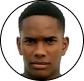

In [8]:
player_images('Saprissa','Ryan Bolanos Davis')

## Get teams starting lineups by game

In [9]:
#main_df = main_df.query("jugador != ' Aaron Moises Cruz Esquivel' ")
#main_df['jugador'].unique()

In [10]:
def get_lineups(instat_data):
  main_df = instat_data
  '''
  Process to identify the startup lineup by games and teams
  '''
  # Get the minimum ID of player's action
  #query = "SELECT  Partido, Equipos, camisa, jugador, min(ID) as 'min_id' FROM main_df WHERE Partido = '{}' GROUP BY Partido, Equipos, camisa, jugador".format(game)
  query = "SELECT  Partido, Equipos, camisa, jugador, min(ID) as 'min_id' FROM main_df GROUP BY Partido, Equipos, camisa, jugador"
  lineup_df = pysqldf(query) 
  lineup_df['min_id'] = pd.to_numeric(lineup_df['min_id'])
  
  #Get the list of games
  partidos = lineup_df['Partido'].unique()


  lineups_data = pd.DataFrame()
  for game in partidos:
    temp_df = lineup_df.query("Partido == @game")
    teams_temp_df = temp_df['Equipos'].unique()
    for teams in teams_temp_df:
      temp_df = lineup_df.query("Partido == @game and Equipos == @teams")
      temp_lineup = temp_df.nsmallest(n=11, columns=['min_id'], keep='last')
      lineups_data = lineups_data.append(temp_lineup) 
  return lineups_data

## Filter main dataframe with important columns

In [11]:
pass_df = main_df[['ID','start','end','pos_x','pos_y','Partido','camisa','jugador','Equipos','Acciones']]
pass_df.head()

,ID,start,end,pos_x,pos_y,Partido,camisa,jugador,Equipos,Acciones
1,2,4.050781,24.05,52.9,34.2,Guanacasteca-0-2-Herediano2,10,Yeltsin Tejeda,Herediano,Pases precisos
4,5,7.320312,27.32,35.4,39.5,Guanacasteca-0-2-Herediano2,5,Ariel Roman Soto,Herediano,Pases precisos
6,7,8.773438,28.77,61.9,19.0,Guanacasteca-0-2-Herediano2,4,Orlando Moises Galo Calderon,Herediano,Pases precisos
8,9,9.921875,29.92,71.3,13.7,Guanacasteca-0-2-Herediano2,9,Anthony Daniel Contreras Enriquez,Herediano,Pases inefectivo
9,11,21.250000,41.25,61.0,0.0,Guanacasteca-0-2-Herediano2,97,Rawy Jafet Rodriguez Osorio,Herediano,Pases precisos


## Remove actions with the same (x,y) position as passes and assists

In [12]:
# Identify x,y for passes and assists
duplicate_pass_location = pysqldf("SELECT distinct ID,pos_x, pos_y from pass_df WHERE Acciones in ('Pases precisos','Asistencias')")

duplicates_id = pysqldf("SELECT distinct a.ID,a.pos_x,a.pos_y from pass_df A inner join duplicate_pass_location B ON a.pos_x = b.pos_x and a.pos_y = b.pos_y WHERE A.Acciones not in ('Pases precisos','Asistencias') ")

#pass_df = pysqldf("SELECT * FROM pass_df WHERE ([ID],pos_x,pos_y) NOT IN (SELECT [ID],pos_x,pos_y FROM duplicates_id) ")

pass_df = pysqldf("SELECT A.* FROM pass_df A  LEFT JOIN duplicates_id B ON A.ID = B.ID and A.pos_x = B.pos_x and A.pos_y = B.pos_y WHERE B.ID is null ")
pass_df.head()

,ID,start,end,pos_x,pos_y,Partido,camisa,jugador,Equipos,Acciones
0,2,4.050781,24.05,52.9,34.2,Guanacasteca-0-2-Herediano2,10,Yeltsin Tejeda,Herediano,Pases precisos
1,5,7.320312,27.32,35.4,39.5,Guanacasteca-0-2-Herediano2,5,Ariel Roman Soto,Herediano,Pases precisos
2,7,8.773438,28.77,61.9,19.0,Guanacasteca-0-2-Herediano2,4,Orlando Moises Galo Calderon,Herediano,Pases precisos
3,9,9.921875,29.92,71.3,13.7,Guanacasteca-0-2-Herediano2,9,Anthony Daniel Contreras Enriquez,Herediano,Pases inefectivo
4,11,21.250000,41.25,61.0,0.0,Guanacasteca-0-2-Herediano2,97,Rawy Jafet Rodriguez Osorio,Herediano,Pases precisos


## Setup the `end` columns (x,y,jugadores,equipos,acciones)

In [13]:
pass_df['pos_x_end'] = pass_df['pos_x'].shift(-1)
pass_df['pos_y_end'] = pass_df['pos_y'].shift(-1)
pass_df['jugador_end'] = pass_df['jugador'].shift(-1)
pass_df['camisa_end'] = pass_df['camisa'].shift(-1)
pass_df['equipos_end'] = pass_df['Equipos'].shift(-1)
pass_df['acciones_end'] = pass_df['Acciones'].shift(-1)
pass_df.head()

,ID,start,end,pos_x,pos_y,Partido,camisa,jugador,Equipos,Acciones,pos_x_end,pos_y_end,jugador_end,camisa_end,equipos_end,acciones_end
0,2,4.050781,24.05,52.9,34.2,Guanacasteca-0-2-Herediano2,10,Yeltsin Tejeda,Herediano,Pases precisos,35.4,39.5,Ariel Roman Soto,5,Herediano,Pases precisos
1,5,7.320312,27.32,35.4,39.5,Guanacasteca-0-2-Herediano2,5,Ariel Roman Soto,Herediano,Pases precisos,61.9,19.0,Orlando Moises Galo Calderon,4,Herediano,Pases precisos
2,7,8.773438,28.77,61.9,19.0,Guanacasteca-0-2-Herediano2,4,Orlando Moises Galo Calderon,Herediano,Pases precisos,71.3,13.7,Anthony Daniel Contreras Enriquez,9,Herediano,Pases inefectivo
3,9,9.921875,29.92,71.3,13.7,Guanacasteca-0-2-Herediano2,9,Anthony Daniel Contreras Enriquez,Herediano,Pases inefectivo,61.0,0.0,Rawy Jafet Rodriguez Osorio,97,Herediano,Pases precisos
4,11,21.250000,41.25,61.0,0.0,Guanacasteca-0-2-Herediano2,97,Rawy Jafet Rodriguez Osorio,Herediano,Pases precisos,40.0,11.7,Juan Miguel Basulto Medina,24,Herediano,Pases precisos


## Select only passes and assists

In [14]:
onlyPasses = pass_df.query("Acciones in ('Pases precisos','Asistencias')") 
onlyPasses.head(5)

,ID,start,end,pos_x,pos_y,Partido,camisa,jugador,Equipos,Acciones,pos_x_end,pos_y_end,jugador_end,camisa_end,equipos_end,acciones_end
0,2,4.050781,24.05,52.9,34.2,Guanacasteca-0-2-Herediano2,10,Yeltsin Tejeda,Herediano,Pases precisos,35.4,39.5,Ariel Roman Soto,5,Herediano,Pases precisos
1,5,7.320312,27.32,35.4,39.5,Guanacasteca-0-2-Herediano2,5,Ariel Roman Soto,Herediano,Pases precisos,61.9,19.0,Orlando Moises Galo Calderon,4,Herediano,Pases precisos
2,7,8.773438,28.77,61.9,19.0,Guanacasteca-0-2-Herediano2,4,Orlando Moises Galo Calderon,Herediano,Pases precisos,71.3,13.7,Anthony Daniel Contreras Enriquez,9,Herediano,Pases inefectivo
4,11,21.250000,41.25,61.0,0.0,Guanacasteca-0-2-Herediano2,97,Rawy Jafet Rodriguez Osorio,Herediano,Pases precisos,40.0,11.7,Juan Miguel Basulto Medina,24,Herediano,Pases precisos
5,14,25.187500,45.18,40.0,11.7,Guanacasteca-0-2-Herediano2,24,Juan Miguel Basulto Medina,Herediano,Pases precisos,33.9,33.2,Ariel Roman Soto,5,Herediano,Pases precisos


## Select passes where `Equipos` is equal to `equipos_end`.
With this filter we ensure that the player makes a pass to a team player

In [15]:
#Data for pass flow chart
pass_flow_df = onlyPasses

onlyPasses.query("Equipos == equipos_end", inplace=True)
onlyPasses.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ID,start,end,pos_x,pos_y,Partido,camisa,jugador,Equipos,Acciones,pos_x_end,pos_y_end,jugador_end,camisa_end,equipos_end,acciones_end
0,2,4.050781,24.05,52.9,34.2,Guanacasteca-0-2-Herediano2,10,Yeltsin Tejeda,Herediano,Pases precisos,35.4,39.5,Ariel Roman Soto,5,Herediano,Pases precisos
1,5,7.320312,27.32,35.4,39.5,Guanacasteca-0-2-Herediano2,5,Ariel Roman Soto,Herediano,Pases precisos,61.9,19.0,Orlando Moises Galo Calderon,4,Herediano,Pases precisos
2,7,8.773438,28.77,61.9,19.0,Guanacasteca-0-2-Herediano2,4,Orlando Moises Galo Calderon,Herediano,Pases precisos,71.3,13.7,Anthony Daniel Contreras Enriquez,9,Herediano,Pases inefectivo
4,11,21.250000,41.25,61.0,0.0,Guanacasteca-0-2-Herediano2,97,Rawy Jafet Rodriguez Osorio,Herediano,Pases precisos,40.0,11.7,Juan Miguel Basulto Medina,24,Herediano,Pases precisos
5,14,25.187500,45.18,40.0,11.7,Guanacasteca-0-2-Herediano2,24,Juan Miguel Basulto Medina,Herediano,Pases precisos,33.9,33.2,Ariel Roman Soto,5,Herediano,Pases precisos


## Count passes between players by games

In [16]:
pass_count_players = pysqldf("SELECT Partido, Equipos, jugador, camisa, equipos_end, jugador_end,camisa_end,count(*) 'cantidad_pases' from onlyPasses group by Partido,Equipos, jugador, camisa, equipos_end,jugador_end,camisa_end")
pass_count_players.head()

,Partido,Equipos,jugador,camisa,equipos_end,jugador_end,camisa_end,cantidad_pases
0,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aaron Rene Suarez Zuniga,25,Alajuelense,Alex Lopez Rodrigues,11,3
1,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aaron Rene Suarez Zuniga,25,Alajuelense,Alexis Yohaslin Gamboa Rojas,13,2
2,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aaron Rene Suarez Zuniga,25,Alajuelense,Aubrey Rudolph Robert David,52,4
3,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aaron Rene Suarez Zuniga,25,Alajuelense,Bryan Ruiz,10,8
4,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aaron Rene Suarez Zuniga,25,Alajuelense,Celso Borges,5,10


## Average Position players by Games

In [17]:
players_avg_position = pysqldf("SELECT Partido,Equipos,jugador, camisa, avg(pos_x) as 'avg_pos_x', avg(pos_y) as 'avg_pos_y' FROM main_df WHERE Acciones in ('Pases precisos','Asistencias') GROUP BY Partido,Equipos,jugador, camisa ")
players_avg_position.head()



,Partido,Equipos,jugador,camisa,avg_pos_x,avg_pos_y
0,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aaron Rene Suarez Zuniga,25,64.705000,21.017500
1,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Alex Lopez Rodrigues,11,49.503846,32.492308
2,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Alexis Yohaslin Gamboa Rojas,13,36.885185,48.672222
3,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aubrey Rudolph Robert David,52,50.588372,60.241860
4,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Bryan Ruiz,10,62.911268,40.278873


In [18]:
start11 = get_lineups(main_df)

#Only 11 startup
players_avg_position = pd.merge(players_avg_position, start11, on=["Partido","Equipos","jugador","camisa"])

## Add avg position columns to `pass_count_players` dataframe

In [19]:
# Average position columns for 'jugador'
pass_count_players = pysqldf("SELECT A.*, B.avg_pos_x as 'jugador_avg_pos_x', B.avg_pos_y as 'jugador_avg_pos_y' FROM pass_count_players A LEFT JOIN players_avg_position B on A.Partido = B.Partido and A.jugador = B.jugador and A.camisa = B.camisa and A.Equipos = B.Equipos")
# Average position columns for 'jugador_end'
pass_count_players = pysqldf("SELECT A.*, B.avg_pos_x as 'jugador_end_avg_pos_x', B.avg_pos_y as 'jugador_end_avg_pos_y' FROM pass_count_players A LEFT JOIN players_avg_position B on A.Partido = B.Partido and A.jugador_end = B.jugador and A.camisa_end = B.camisa and A.Equipos = B.Equipos")

pass_count_players.head()

,Partido,Equipos,jugador,camisa,equipos_end,jugador_end,camisa_end,cantidad_pases,jugador_avg_pos_x,jugador_avg_pos_y,jugador_end_avg_pos_x,jugador_end_avg_pos_y
0,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aaron Rene Suarez Zuniga,25,Alajuelense,Alex Lopez Rodrigues,11,3,64.705,21.0175,49.503846,32.492308
1,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aaron Rene Suarez Zuniga,25,Alajuelense,Alexis Yohaslin Gamboa Rojas,13,2,64.705,21.0175,36.885185,48.672222
2,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aaron Rene Suarez Zuniga,25,Alajuelense,Aubrey Rudolph Robert David,52,4,64.705,21.0175,50.588372,60.241860
3,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aaron Rene Suarez Zuniga,25,Alajuelense,Bryan Ruiz,10,8,64.705,21.0175,62.911268,40.278873
4,Alajuelense-0-0-Deportivo-Saprissa2,Alajuelense,Aaron Rene Suarez Zuniga,25,Alajuelense,Celso Borges,5,10,64.705,21.0175,55.983051,20.794915


## Logo function

In [20]:
def set_logos(homeTeam,awayTeam):

  # Home team logo
  # UNAFUT
  if homeTeam == 'Perez Zeledon':
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/Perez.png")
    
  elif homeTeam == 'Mun. Grecia': 
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/Grecia.png")
    
  elif homeTeam == 'Guadalupe': 
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/Guadalupe.png")
    
  elif homeTeam == 'Cartagines': 
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/Cartago.png")
    
  elif homeTeam == 'Alajuelense': 
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/lda.png")
    
  elif homeTeam == 'Herediano': 
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/Heredia.png")
    
  elif homeTeam == 'San Carlos': 
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/San Carlos.png")
    
  elif homeTeam == 'Saprissa': 
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/Saprissa.png")
    
  elif homeTeam == 'Sporting FC': 
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/Sporting.png")
    
  elif homeTeam == 'Santos': 
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/Santos.png")
    
  elif homeTeam == 'Guanacasteca': 
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/guana.png")
    
  elif homeTeam == 'Puntarenas': 
    image_home = Image.open("/content/drive/MyDrive/logos/Costa Rica/Puntarenas.png")
  
  # U20 WWC
  if homeTeam == 'Colombia U20':
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/COL.png")
    
  elif homeTeam == 'Germany U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/GER.png")
  
  elif homeTeam == 'New Zealand U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/NZL.png")

  elif homeTeam == 'Mexico U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/MEX.png")

  elif homeTeam == 'Brazil U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/BRA.png")

  elif homeTeam == 'Spain U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/ESP.png")

  elif homeTeam == 'Australia U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/AUS.png")

  elif homeTeam == 'Costa Rica U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/CRC.png")
  
  elif homeTeam == 'United States U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/USA.png")
  
  elif homeTeam == 'Ghana U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/GHA.png")

  elif homeTeam == 'Japan U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/JPN.png")
  
  elif homeTeam == 'Netherlands U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/NED.png")
  
  elif homeTeam == 'France U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/FRA.png")
  
  elif homeTeam == 'Nigeria U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/NGA.png")
  
  elif homeTeam == 'Canada U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/CAN.png")
  
  elif homeTeam == 'Korea Republic U20': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/KOR.png")

  # Swiss League
  if homeTeam == 'Young Boys':
    image_home = Image.open("/content/drive/MyDrive/logos/Suiza/BSC_Young_Boys_logo.png")
    
  elif homeTeam == 'Zurich': 
    image_home = Image.open("/content/drive/MyDrive/logos/Suiza/FC_Zürich_logo.png")
  
  elif homeTeam == 'Basel': 
    image_home = Image.open("/content/drive/MyDrive/logos/Suiza/FC_Basel_Logo.png")

  elif homeTeam == 'Winterthur': 
    image_home = Image.open("/content/drive/MyDrive/logos/U20 WWC/MEX.png")

  elif homeTeam == 'St Gallen': 
    image_home = Image.open("/content/drive/MyDrive/logos/Suiza/FC_St_Gallen_logo.png")

  elif homeTeam == 'Servette': 
    image_home = Image.open("/content/drive/MyDrive/logos/Suiza/Servette_FC_logo.png")

  elif homeTeam == 'Sion': 
    image_home = Image.open("/content/drive/MyDrive/logos/Suiza/FC_Sion_Logo.png")

  elif homeTeam == 'Lugano': 
    image_home = Image.open("/content/drive/MyDrive/logos/Suiza/FC_Lugano_logo.png")
  
  elif homeTeam == 'Luzern': 
    image_home = Image.open("/content/drive/MyDrive/logos/Suiza/FC_Luzern_logo.png")
  
  elif homeTeam == 'Grasshopper': 
    image_home = Image.open("/content/drive/MyDrive/logos/Suiza/grasshopper_logo.png")

  

               

  # Away team logo
  if awayTeam == 'Perez Zeledon':
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/Perez.png")
    
  elif awayTeam == 'Mun. Grecia': 
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/Grecia.png")
    
  elif awayTeam == 'Guadalupe': 
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/Guadalupe.png")
    
  elif awayTeam == 'Cartagines': 
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/Cartago.png")
    
  elif awayTeam == 'Alajuelense': 
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/lda.png")
    
  elif awayTeam == 'Herediano': 
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/Heredia.png")
    
  elif awayTeam == 'San Carlos': 
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/San Carlos.png")
    
  elif awayTeam == 'Saprissa': 
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/Saprissa.png")
  
  elif awayTeam == 'Sporting FC': 
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/Sporting.png")
    
  elif awayTeam == 'Santos': 
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/Santos.png")
    
  elif awayTeam == 'Guanacasteca': 
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/guana.png")
    
  elif awayTeam == 'Puntarenas': 
    image_away = Image.open("/content/drive/MyDrive/logos/Costa Rica/Puntarenas.png")

  
  # U20 WWC
  elif awayTeam == 'Colombia U20':
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/COL.png")
    
  elif awayTeam == 'Germany U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/GER.png")
  
  elif awayTeam == 'New Zealand U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/NZL.png")

  elif awayTeam == 'Mexico U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/MEX.png")

  elif awayTeam == 'Brazil U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/BRA.png")

  elif awayTeam == 'Spain U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/ESP.png")

  elif awayTeam == 'Australia U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/AUS.png")

  elif awayTeam == 'Costa Rica U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/CRC.png")

  elif awayTeam == 'United States U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/USA.png")
  
  elif awayTeam == 'Ghana U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/GHA.png")

  elif awayTeam == 'Japan U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/JPN.png")
  
  elif awayTeam == 'Netherlands U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/NED.png")
  
  elif awayTeam == 'France U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/FRA.png")
  
  elif awayTeam == 'Nigeria U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/NGA.png")
  
  elif awayTeam == 'Canada U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/CAN.png")
  
  elif awayTeam == 'Korea Republic U20': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/KOR.png")

  
  # Swiss League
  if awayTeam == 'Young Boys':
    image_away = Image.open("/content/drive/MyDrive/logos/Suiza/BSC_Young_Boys_logo.png")
    
  elif awayTeam == 'Zurich': 
    image_away = Image.open("/content/drive/MyDrive/logos/Suiza/FC_Zürich_logo.png")
  
  elif awayTeam == 'Basel': 
    image_away = Image.open("/content/drive/MyDrive/logos/Suiza/FC_Basel_Logo.png")

  elif awayTeam == 'Winterthur': 
    image_away = Image.open("/content/drive/MyDrive/logos/U20 WWC/MEX.png")

  elif awayTeam == 'St Gallen': 
    image_away = Image.open("/content/drive/MyDrive/logos/Suiza/FC_St_Gallen_logo.png")

  elif awayTeam == 'Servette': 
    image_away = Image.open("/content/drive/MyDrive/logos/Suiza/Servette_FC_logo.png")

  elif awayTeam == 'Sion': 
    image_away = Image.open("/content/drive/MyDrive/logos/Suiza/FC_Sion_Logo.png")

  elif awayTeam == 'Lugano': 
    image_away = Image.open("/content/drive/MyDrive/logos/Suiza/FC_Lugano_logo.png")
  
  elif awayTeam == 'Luzern': 
    image_away = Image.open("/content/drive/MyDrive/logos/Suiza/FC_Luzern_logo.png")
  
  elif awayTeam == 'Grasshopper': 
    image_away = Image.open("/content/drive/MyDrive/logos/Suiza/grasshopper_logo.png")


  
  
  return image_home,image_away                      

In [21]:
main_df.equipo_casa.unique()

array(['Guanacasteca', 'Alajuelense', 'Perez Zeledon', 'Puntarenas',
       'Cartagines', 'Guadalupe', 'Sporting FC', 'Mun. Grecia',
       'Herediano', 'San Carlos', 'Saprissa', 'Santos'], dtype=object)

## `Big Table - Players`

### Function

In [22]:
def bigTablePlayers(team=None,player=None,metric=None):
  metrics_max_values = []
  metrics_min_values = []
  big_table_players_return = pd.DataFrame()
  max_value = 0
  min_value = 0

  big_table_players = pysqldf("SELECT Equipos,rtrim(ltrim(jugador)) as 'jugador',Acciones, count(Acciones) as total FROM main_df  group by Equipos,jugador, nombre_torneo, Acciones") 
  big_table_players = big_table_players.pivot(index=['Equipos','jugador'],
                                              columns='Acciones',
                                              values='total')
  big_table_players = big_table_players.reset_index()
  big_table_players = big_table_players.fillna(0)
  big_table_players['total_centros'] = big_table_players['Centros efectivo'] + big_table_players['Centros inefectivo']
  big_table_players['efectividad_centros'] = big_table_players['Centros efectivo'] / big_table_players['total_centros']
  big_table_players['total_disputas_aereas'] = big_table_players['Disputas por arriba perdio'] + big_table_players['Disputas por arriba vencio']
  big_table_players['efectividad_disputas_aereas'] = big_table_players['Disputas por arriba vencio'] / big_table_players['total_disputas_aereas']
  big_table_players['total_disputas'] = big_table_players['Disputas perdio'] + big_table_players['Disputas vencio']
  big_table_players['efectividad_disputas'] = big_table_players['Disputas vencio'] / big_table_players['total_disputas']
  big_table_players['total_entradas'] = big_table_players['Entradas Acciones con exito'] + big_table_players['Entradas Acciones sin  exito']
  big_table_players['efectividad_entradas'] = big_table_players['Entradas Acciones con exito'] / big_table_players['total_entradas']
  big_table_players['total_pases_finalizacion'] = big_table_players['Pases de finalizacion efectivo'] + big_table_players['Pases de finalizacion inefectivo']
  big_table_players['efectividad_pases_finalizacion'] = big_table_players['Pases de finalizacion efectivo'] / big_table_players['total_pases_finalizacion']
  big_table_players['total_regates'] = big_table_players['Regates Acciones con exito'] + big_table_players['Regates Acciones sin  exito']
  big_table_players['efectividad_regates'] = big_table_players['Regates Acciones con exito'] / big_table_players['total_regates']
  big_table_players['total_pases'] = big_table_players['Pases precisos'] + big_table_players['Pases inefectivo'] + big_table_players['Asistencias']
  big_table_players['efectividad_pases'] = (big_table_players['Pases precisos'] +  big_table_players['Asistencias']) / big_table_players['total_pases']

  big_table_players['total_tiros'] = big_table_players['Tiros'] + big_table_players['Goles']
  big_table_players = big_table_players.fillna(0)


  if (team is not None and player is not None and metric is None):
    big_table_players = big_table_players.query("Equipos == @team and jugador == @player")
  elif (team is not None and player is not None and metric is not None):
    for column in metric:
      max_value = big_table_players[column].max()
      min_value = big_table_players[column].mean()
      metrics_max_values.append(max_value)
      metrics_min_values.append(min_value)

    metric.insert(0,'Equipos')
    metric.insert(1,'jugador')

    big_table_players = big_table_players[metric]
    big_table_players = big_table_players.query("Equipos == @team and jugador == @player")
  elif (team is not None and player is None and metric is None):
    big_table_players = big_table_players.query("Equipos == @team")
  elif (team is None and player is not None and metric is None):
    big_table_players = big_table_players.query("jugador == @player")
  elif (team is None and player is None and metric is not None):
    metric.insert(0,'Equipos')
    metric.insert(1,'jugador')
    
    

    

  return big_table_players, metrics_max_values, metrics_min_values

### Example

In [23]:
player_df,max_values,min_metrics = bigTablePlayers(team='Puntarenas', player='Yoserth Hernandez Loria',metric=['Asistencias',
                                                                     'Goles',
                                                                     'efectividad_pases',
                                                                     'total_pases',
                                                                     'efectividad_regates'])
player_df,max_values,min_metrics

(Acciones     Equipos                  jugador  Asistencias  Goles  \
 230       Puntarenas  Yoserth Hernandez Loria          3.0    3.0   
 
 Acciones  efectividad_pases  total_pases  efectividad_regates  
 230                0.729167        432.0                 0.75  ,
 [6.0, 8.0, 1.0, 914.0, 1.0],
 [0.5520231213872833,
  0.8092485549132948,
  0.7703423748263556,
  222.57514450867052,
  0.5135783971051848])

In [24]:
bigTablePlayers(team='Saprissa')

(Acciones   Equipos                            jugador  Asistencias  Autogol  \
 288       Saprissa                       Aaron Fallas          0.0      0.0   
 289       Saprissa         Aaron Moises Cruz Esquivel          0.0      0.0   
 290       Saprissa            Alvaro Jose Zamora Mata          1.0      0.0   
 291       Saprissa                         Andy Reyes          0.0      0.0   
 292       Saprissa              Ariel Rodriguez Araya          1.0      0.0   
 293       Saprissa                         Atim Roper          0.0      0.0   
 294       Saprissa      Carlos Arturo Villegas Retana          0.0      0.0   
 295       Saprissa                  Christian Bolanos          0.0      0.0   
 296       Saprissa                       David Guzman          2.0      0.0   
 297       Saprissa                      Fidel Escobar          0.0      0.0   
 298       Saprissa                      Gerald Taylor          0.0      0.0   
 299       Saprissa     Gersell Emanuel 

## `Big Table - Teams`

### Function

In [25]:
def bigTableTeams(team=None,metric=None):
  big_table_teams = pysqldf("SELECT Equipos,Acciones, count(Acciones) as total FROM main_df  group by Equipos, nombre_torneo, Acciones") 
  big_table_teams = big_table_teams.pivot(index=['Equipos'],
                                              columns='Acciones',
                                              values='total')
  big_table_teams = big_table_teams.reset_index()
  big_table_teams = big_table_teams.fillna(0)
  big_table_teams['total_centros'] = big_table_teams['Centros efectivo'] + big_table_teams['Centros inefectivo']
  big_table_teams['efectividad_centros'] = big_table_teams['Centros efectivo'] / big_table_teams['total_centros']
  big_table_teams['total_disputas_aereas'] = big_table_teams['Disputas por arriba perdio'] + big_table_teams['Disputas por arriba vencio']
  big_table_teams['efectividad_disputas_aereas'] = big_table_teams['Disputas por arriba vencio'] / big_table_teams['total_disputas_aereas']
  big_table_teams['total_disputas'] = big_table_teams['Disputas perdio'] + big_table_teams['Disputas vencio']
  big_table_teams['efectividad_disputas'] = big_table_teams['Disputas vencio'] / big_table_teams['total_disputas']
  big_table_teams['total_entradas'] = big_table_teams['Entradas Acciones con exito'] + big_table_teams['Entradas Acciones sin  exito']
  big_table_teams['efectividad_entradas'] = big_table_teams['Entradas Acciones con exito'] / big_table_teams['total_entradas']
  big_table_teams['total_pases_finalizacion'] = big_table_teams['Pases de finalizacion efectivo'] + big_table_teams['Pases de finalizacion inefectivo']
  big_table_teams['efectividad_pases_finalizacion'] = big_table_teams['Pases de finalizacion efectivo'] / big_table_teams['total_pases_finalizacion']
  big_table_teams['total_regates'] = big_table_teams['Regates Acciones con exito'] + big_table_teams['Regates Acciones sin  exito']
  big_table_teams['efectividad_regates'] = big_table_teams['Regates Acciones con exito'] / big_table_teams['total_regates']
  big_table_teams['total_pases'] = big_table_teams['Pases precisos'] + big_table_teams['Pases inefectivo'] + big_table_teams['Asistencias']
  big_table_teams['efectividad_pases'] = (big_table_teams['Pases precisos'] +  big_table_teams['Asistencias']) / big_table_teams['total_pases']

  big_table_teams['total_tiros'] = big_table_teams['Tiros'] + big_table_teams['Goles']
  big_table_teams['efectividad_tiros'] = (big_table_teams['Tiros en la porteria']+ big_table_teams['Goles']) / big_table_teams['total_tiros']
  big_table_teams = big_table_teams.fillna(0)


  if (team is not None and metric is None):
    big_table_teams = big_table_teams.query("Equipos == @team")
  elif (team is not None and metric is not None):
    metric.insert(0,'Equipos')
    big_table_teams = big_table_teams[metric]
    big_table_teams = big_table_teams.query("Equipos == @team")
  elif (team is None and metric is not None):
    metric.insert(0,'Equipos')
    big_table_teams = big_table_teams[metric]
    

  return big_table_teams

### Example

In [26]:
bigTableTeams(team='Alajuelense',metric=['efectividad_tiros','Tiros en la porteria','total_tiros'])

Acciones,Equipos,efectividad_tiros,Tiros en la porteria,total_tiros
0,Alajuelense,0.361789,63.0,246.0


In [27]:
pysqldf("SELECT Equipos,Acciones, count(Acciones) as total FROM main_df  group by Equipos, nombre_torneo, Acciones")

,Equipos,Acciones,total
0,Alajuelense,Asistencias,20
1,Alajuelense,Autogol,1
2,Alajuelense,Centros efectivo,70
3,Alajuelense,Centros inefectivo,157
4,Alajuelense,Conduccion,318
...,...,...,...
516,Sporting FC,Tiros en la porteria parado,62
517,Sporting FC,Tiros fuera,96
518,Sporting FC,Tiros fuera Porteros,100
519,Sporting FC,Tiros libres a favor,279


## `Pass network`

### Function

In [28]:
def pass_maps(game,team1,team2):
  import re
  import warnings
  warnings.simplefilter("ignore", UserWarning)

  # Variables
  game = game
  team1 = team1
  team2 = team2
  image_home, image_away = "",""

  game_details = main_df.query("Partido == @game")

  game_date = game_details['fecha_partido'].unique()
  home_team = game_details['equipo_casa'].unique()
  away_team = game_details['equipo_visita'].unique()
  final_result = game_details['marcador'].unique()
  tournament = game_details['nombre_torneo'].unique()

  # Clean variable strings
  game_date = str(game_date).replace('[', '').replace(']', '').replace("'",'')
  home_team = str(home_team).replace('[', '').replace(']', '').replace("'",'')
  away_team = str(away_team).replace('[', '').replace(']', '').replace("'",'')
  final_result = str(final_result).replace('[', '').replace(']', '').replace("'",'')
  tournament = str(tournament).replace('[', '').replace(']', '').replace("'",'')


  
  
  # Main graph
  pitch = VerticalPitch(pitch_type='custom',
                pitch_length=105,
                pitch_width=68,
                pitch_color='#eee9e5', 
                line_color='#01161E')
  fig, axs = pitch.grid(figheight=14 ,ncols=2, axis=False, endnote_height=0.05,title_height=0.08,)
  fig.set_facecolor("#eee9e5")
  for idx, ax in enumerate(axs['pitch'].flat):
    if idx == 0:
      ######### TEAM 1 PASS MAP #########
      ax1 = ax
      # Filter data for one game, and one team
      pass_count_players_test = pass_count_players.query("Partido == @game and Equipos == @team1 ")

      # Line colors
      MIN_TRANSPARENCY = 0.3
      color = np.array(to_rgba('#6d6a69'))
      color = np.tile(color, (len(pass_count_players_test), 1))
      c_transparency = pass_count_players_test.cantidad_pases / pass_count_players_test.cantidad_pases.max()
      c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
      color[:, 3] = c_transparency


      # Calculate Line Width
      pass_count_players_test['width']= (pass_count_players_test.cantidad_pases / pass_count_players_test.cantidad_pases.max() *
                                18)

      # Name and shirt number
      pass_count_players_test['full_name'] = pass_count_players_test.camisa + '.' + pass_count_players_test.jugador
      pass_lines = pitch.lines(pass_count_players_test['jugador_avg_pos_x'], pass_count_players_test['jugador_avg_pos_y'],
                              pass_count_players_test['jugador_end_avg_pos_x'], pass_count_players_test['jugador_end_avg_pos_y'],
                              lw=pass_count_players_test.width,
                              color=color, zorder=1, ax=ax1)
      pass_nodes = pitch.scatter(pass_count_players_test['jugador_avg_pos_x'], pass_count_players_test['jugador_avg_pos_y'],
                              s=1000, color='#eee9e5', edgecolors='#6d6a69', linewidth=1, alpha=1, ax=ax1)
      # Put player number in markers
      for index, row in pass_count_players_test.iterrows():
        pitch.annotate(row.camisa, xy=(row.jugador_avg_pos_x, row.jugador_avg_pos_y), c='#6d6a69', va='center',ha='center', size=11, ax=ax1)

      ######### TITLE SECTION #########
      #ss = pass_count_players.query("Partido == @game")
      
      #team1 = pass_count_players_test['Equipos'].unique()
      ax1.text(34, 110, team1, 
              size=35,
              fontproperties = fontprop,
              #fontname = 'Oswald',
              fontweight = 'bold',
              ha='center', va='center', color='#6d6a69')


      #################################

      # List of players
      
      players = pass_count_players_test[['full_name','camisa','jugador_avg_pos_x']]
      players = players.dropna()
      players = players.sort_values(by=['camisa'],ascending=True)
      players = players['full_name'].unique()
      players_name = str(players)
      players_name = players_name.replace('[',' ')
      players_name = players_name.replace(']',' ')
      players_name = players_name.replace("'",' ')
      
      #query = "SELECT DISTINCT full_name FROM pass_count_players_test where jugador_avg_pos_x <> 'Nan' ORDER BY 1 asc"
      #players_name =  pysqldf(query) 

      axs['endnote'].text(0, 0.5, players_name,
                      fontsize=12, va='center', ha='left', color='black')
      axs['endnote'].text(0, 1.5, 'Lineup',
                      fontsize=12, va='center', ha='left', color='black',fontweight = 'bold') 
    else:
      ######### TEAM 2 PASS MAP #########
      ax2 = ax

      # Filter data for one game, and one team
      pass_count_players_test = pass_count_players.query("Partido == @game and Equipos == @team2 ")

      # Line colors
      MIN_TRANSPARENCY = 0.3
      color = np.array(to_rgba('#6d6a69'))
      color = np.tile(color, (len(pass_count_players_test), 1))
      c_transparency = pass_count_players_test.cantidad_pases / pass_count_players_test.cantidad_pases.max()
      c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
      color[:, 3] = c_transparency



      game = pass_count_players_test['Partido'].unique()
      team = pass_count_players_test['Equipos'].unique()

      # Calculate Line Width
      pass_count_players_test['width']= (pass_count_players_test.cantidad_pases / pass_count_players_test.cantidad_pases.max() *
                                18)

      # Name and shirt number
      pass_count_players_test['full_name'] = pass_count_players_test.camisa + '.' + pass_count_players_test.jugador
      pass_lines2 = pitch.lines(pass_count_players_test['jugador_avg_pos_x'], pass_count_players_test['jugador_avg_pos_y'],
                              pass_count_players_test['jugador_end_avg_pos_x'], pass_count_players_test['jugador_end_avg_pos_y'],
                              lw=pass_count_players_test.width,
                              color=color, zorder=1, ax=ax2)
      pass_nodes2 = pitch.scatter(pass_count_players_test['jugador_avg_pos_x'], pass_count_players_test['jugador_avg_pos_y'],
                              s=1000, color='#eee9e5', edgecolors='#6d6a69', linewidth=1, alpha=1, ax=ax2)
      # Put player number in markers
      for index, row in pass_count_players_test.iterrows():
        pitch.annotate(row.camisa, xy=(row.jugador_avg_pos_x, row.jugador_avg_pos_y), c='#6d6a69', va='center',ha='center', size=11, ax=ax2)

      ######### TITLE SECTION #########
      #ss = pass_count_players.query("Partido == @game ")
      #team2 = pass_count_players_test['Equipos'].unique()
      ax2.text(34, 110,team2, 
              size=35,
              fontproperties = fontprop,
              #fontname = 'Oswald',
              fontweight = 'bold',
              ha='center', va='center', color='#6d6a69')


      #################################


      # List of players      
      players = pass_count_players_test[['full_name','camisa','jugador_avg_pos_x']]
      players = players.dropna()
      players = players.sort_values(by=['camisa'],ascending=True)
      players = players['full_name'].unique()
      players_name = str(players)
      players_name = players_name.replace('[',' ')
      players_name = players_name.replace(']',' ')
      players_name = players_name.replace("'",' ')

      axs['endnote'].text(0.55, 0.5, players_name,
                      fontsize=12, va='center', ha='left', color='black') 
      
      axs['endnote'].text(0.55, 1.5, 'Lineup',
                      fontsize=12, va='center', ha='left', color='black',fontweight = 'bold') 

      

  ######### TITLE SECTION #########
  #ss = pass_count_players.query("Partido == 'Alajuelense-0-1-Deportivo-Saprissa'")
  #team1, team2 = ss['Equipos'].unique()
  axs['title'].text(0.001, 0.88, 'Pass Networks', fontsize=20,
                     va='center', ha='left',color='#6d6a69',fontweight = 'bold',fontproperties = game_det_fontprop)
  axs['title'].text(0.001, 0.68, f'{home_team} {final_result} {away_team}', fontsize=12, 
                     va='center', ha='left',color='#6d6a69',fontproperties= title_det_fontprop)
  axs['title'].text(0.001, 0.48, f'{game_date} | {tournament}', fontsize=12,
                     va='center', ha='left',color='#6d6a69',fontproperties= title_det_fontprop)
  #################################

  ######### LOGO SECTION #########
  #logo_away = "/content/drive/MyDrive/logos/Costa Rica/Saprissa.png"
  #image_s = urlopen(logo_s)
  #image_away = Image.open(logo_away)

  #logo_home = "/content/drive/MyDrive/logos/Costa Rica/lda.png"
  #image_lda = urlopen(logo_lda)
  #image_home = Image.open(logo_home)
  
  image_home, image_away = set_logos(home_team,away_team)
  

  ax_home_logo = add_image(image_home, fig,
                        left=0.0491,
                        bottom=0.82,
                        height=0.06)

  ax_away_logo = add_image(image_away, fig, 
                                left=0.53,
                                bottom=0.82,
                                height=0.07)
  
  plt.show()

  ####################################

### Example

In [29]:
main_df['Partido'].unique()

array(['Guanacasteca-0-2-Herediano2', 'Alajuelense-2-0-Santos-de-Guapile',
       'Perez-Zeledon-2-0-Deportivo-Saprissa2',
       'Puntarenas-3-0-San-Carlos', 'Cartagines-1-2-Municipal-Grecia',
       'Guadalupe-1-2-Sporting-FC-San-Jose2',
       'Sporting-FC-San-Jose-3-3-Santos-de-Guapiles2',
       'Municipal-Grecia-0-3-Deportivo-Sapriss',
       'Alajuelense-4-1-Guanacasteca2', 'Herediano-1-0-Guadalup',
       'Cartagines-1-3-Puntarenas2', 'San-Carlos-2-1-Perez-Zeledon',
       'Perez-Zeledon-2-3-Municipal-Grecia', 'San-Carlos-1-1-Cartagines2',
       'Herediano-3-0-Alajuelense2', 'Deportivo-Saprissa-1-1-Puntarenas2',
       'Santos-de-Guapiles-3-3-Guadalupe2',
       'Guanacasteca-0-0-Sporting-FC-San-Jose2',
       'Sporting-FC-San-Jose-1-2-Herediano2',
       'Guadalupe-1-3-Alajuelense2', 'Deportivo-Saprissa-1-1-Cartagines2',
       'Puntarenas-1-0-Perez-Zeledo', 'Municipal-Grecia-0-1-San-Carlos',
       'Santos-de-Guapiles-0-1-Guanacasteca',
       'Sporting-FC-San-Jose-2-2-Alaju

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

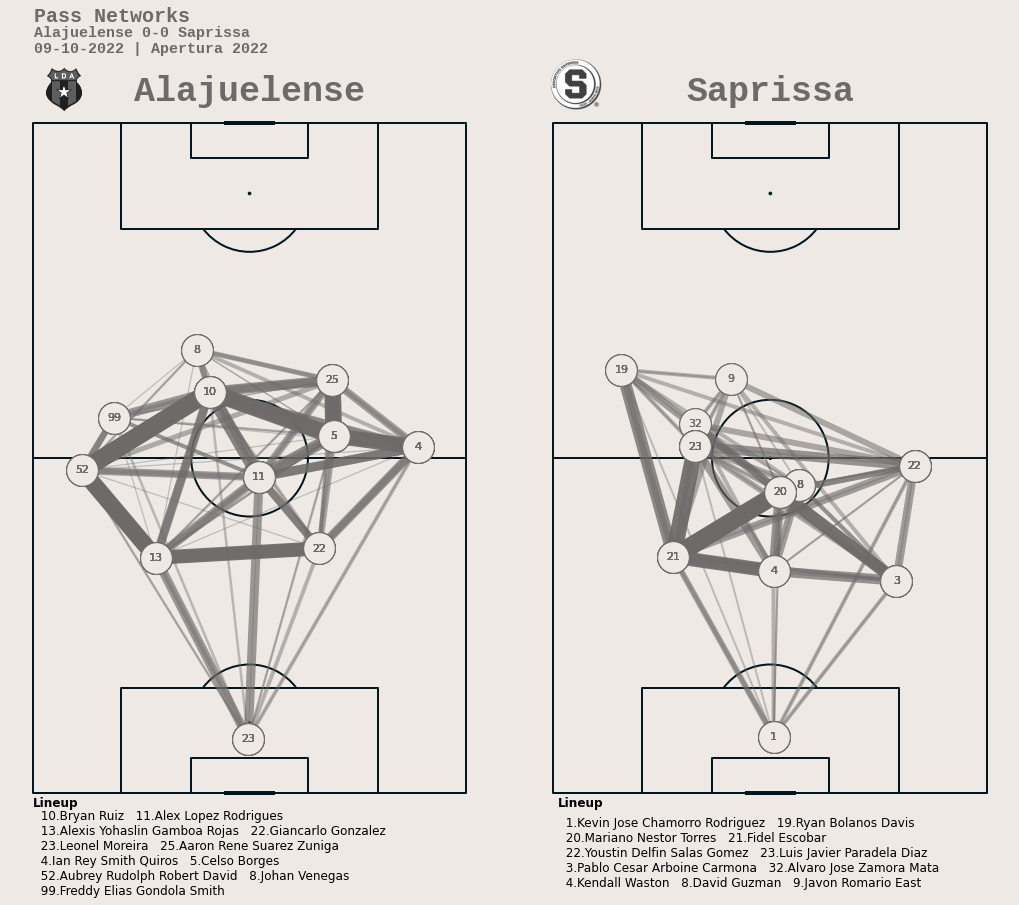

In [30]:
pass_maps('Alajuelense-0-0-Deportivo-Saprissa2','Alajuelense','Saprissa')



In [31]:
main_df['Partido'].unique()

array(['Guanacasteca-0-2-Herediano2', 'Alajuelense-2-0-Santos-de-Guapile',
       'Perez-Zeledon-2-0-Deportivo-Saprissa2',
       'Puntarenas-3-0-San-Carlos', 'Cartagines-1-2-Municipal-Grecia',
       'Guadalupe-1-2-Sporting-FC-San-Jose2',
       'Sporting-FC-San-Jose-3-3-Santos-de-Guapiles2',
       'Municipal-Grecia-0-3-Deportivo-Sapriss',
       'Alajuelense-4-1-Guanacasteca2', 'Herediano-1-0-Guadalup',
       'Cartagines-1-3-Puntarenas2', 'San-Carlos-2-1-Perez-Zeledon',
       'Perez-Zeledon-2-3-Municipal-Grecia', 'San-Carlos-1-1-Cartagines2',
       'Herediano-3-0-Alajuelense2', 'Deportivo-Saprissa-1-1-Puntarenas2',
       'Santos-de-Guapiles-3-3-Guadalupe2',
       'Guanacasteca-0-0-Sporting-FC-San-Jose2',
       'Sporting-FC-San-Jose-1-2-Herediano2',
       'Guadalupe-1-3-Alajuelense2', 'Deportivo-Saprissa-1-1-Cartagines2',
       'Puntarenas-1-0-Perez-Zeledo', 'Municipal-Grecia-0-1-San-Carlos',
       'Santos-de-Guapiles-0-1-Guanacasteca',
       'Sporting-FC-San-Jose-2-2-Alaju

In [32]:
fm.findSystemFonts(fontpaths=None, fontext="ttf")
#!rm ~/.cache/matplotlib -rf

['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/L

## `Team heatmap`

### Function

In [33]:
def team_heatmap(data,game,team):
  from matplotlib.colors import LinearSegmentedColormap

  game = game
  team = team

  # Filter data for the specific game and team
  data_df = data.query("Partido == @game and Equipos == @team ")

  # Convert columns to numeric
  data_df['pos_x'] = pd.to_numeric(data_df['pos_x'])
  data_df['pos_y'] = pd.to_numeric(data_df['pos_y'])
  
  # Setup the rival team
  rival = data_df.query("rival != @team")
  rival = rival['rival'].unique()


  # Main
  pitch = VerticalPitch(pitch_type='custom',
                pitch_length=105,
                pitch_width=68,
                pitch_color='#eee9e5',
                line_zorder=2, 
                line_color='#01161E')
  fig, ax = pitch.draw(figsize=(8, 14))
  fig.set_facecolor("#eee9e5")

  pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#eee9e5', '#2f3e46'], N=100)
  
  kdeplot = pitch.kdeplot(data_df.pos_x, data_df.pos_y, ax=ax, cmap=pearl_earring_cmap, shade=True, levels=300)
  #ax.set_title(f'Jean Carlos Sanchez', fontsize=30, pad=-20)
  #subtitle = "{} \n vs {}".format(team,rival)
  #ax.set_title(subtitle, fontsize=30, pad=-20)

  _,image_team = set_logos(team,team)

  ax_logo = add_image(image_team, fig,
                        left=0.0480,
                        bottom=0.88,
                        height=0.05)
  ax.text(34, 110,team, 
              size=35,
              fontproperties = fontprop,
              #fontname = 'Oswald',
              fontweight = 'bold',
              ha='center', va='center', color='#6d6a69')


### Example

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


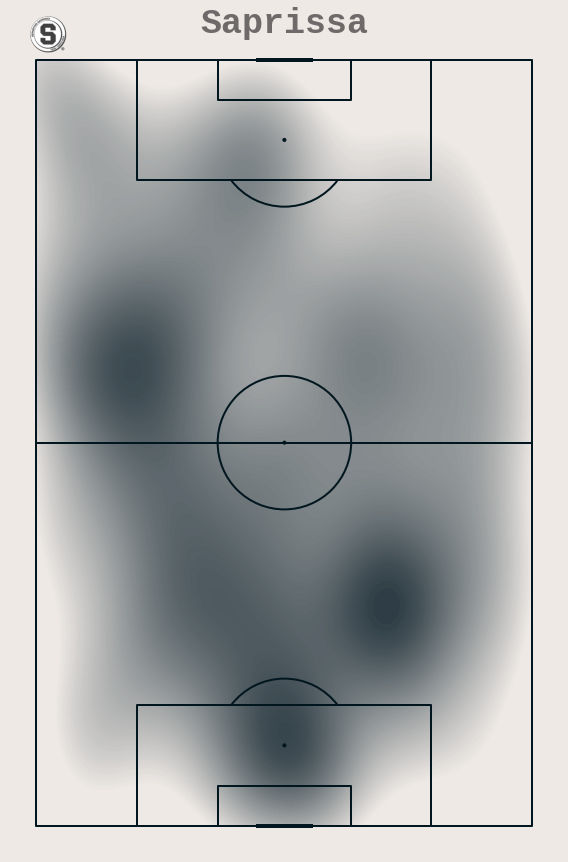

In [34]:
a = team_heatmap(main_df,game='Alajuelense-0-0-Deportivo-Saprissa2',team='Saprissa')


## `Average Positions`

### Function

In [35]:
def players_pos(game):
  game = game

  main_df['pos_x'] = pd.to_numeric(main_df['pos_x'])
  main_df['pos_y'] = pd.to_numeric(main_df['pos_y'])


  #https://sql2pandas.pythonanywhere.com/cookbook/sql-avg-in-pandas
  data_pos = main_df.groupby(['Partido','Equipos','camisa','jugador']).agg(avg_pos_x=('pos_x', 'mean'), avg_pos_y=('pos_y', 'mean')).reset_index() 
  data_pos = data_pos.query("Partido == @game ")

  
  return data_pos


In [36]:
def average_positions(game,team1,team2):

  warnings.simplefilter("ignore", UserWarning)

  # Variables
  game = game
  team1 = team1
  team2 = team2

  # Get starting 11
  start11 = get_lineups(main_df)

  # Get average position for players in the game
  avg_position = players_pos(game)

  # Join starting 11 and avg positions to get the satring 11 players with the corresponding average position for the game
  avg_position = avg_position.join(start11.set_index(['Partido','Equipos','camisa','jugador']), on=['Partido','Equipos','camisa','jugador'],lsuffix="_avg",rsuffix='_str')
  avg_position = avg_position.query("Partido == @game")
  avg_position = avg_position.dropna()

  avg_position['full_name'] = avg_position.camisa + '.' + avg_position.jugador

    
  
  # Get game details for title
  game_details = main_df.query("Partido == @game")

  game_date = game_details['fecha_partido'].unique()
  home_team = game_details['equipo_casa'].unique()
  away_team = game_details['equipo_visita'].unique()
  final_result = game_details['marcador'].unique()
  tournament = game_details['nombre_torneo'].unique()

  # Clean variable strings
  game_date = str(game_date).replace('[', '').replace(']', '').replace("'",'')
  home_team = str(home_team).replace('[', '').replace(']', '').replace("'",'')
  away_team = str(away_team).replace('[', '').replace(']', '').replace("'",'')
  final_result = str(final_result).replace('[', '').replace(']', '').replace("'",'')
  tournament = str(tournament).replace('[', '').replace(']', '').replace("'",'')


  
  
  # Main graph
  pitch = VerticalPitch(pitch_type='custom',
                pitch_length=105,
                pitch_width=68,
                pitch_color='#eee9e5', 
                line_color='#01161E')
  fig, axs = pitch.grid(figheight=14 ,ncols=2, axis=False, endnote_height=0.05,title_height=0.08,)
  fig.set_facecolor("#eee9e5")
  for idx, ax in enumerate(axs['pitch'].flat):
    if idx == 0:
      ######### TEAM 1 PASS MAP #########
      ax1 = ax
      # Filter data for one game, and one team
      team1_posiciones = avg_position.query("Equipos == @team1 ")

      hull = pitch.convexhull(team1_posiciones.avg_pos_x, team1_posiciones.avg_pos_y)
      poly = pitch.polygon(hull, ax=ax1, edgecolor='#6d6a69', facecolor='#6d6a69', alpha=0.3)

      pass_nodes = pitch.scatter(team1_posiciones['avg_pos_x'], team1_posiciones['avg_pos_y'],
                              s=1000, color='#6d6a69', edgecolors='black', linewidth=1, alpha=1, ax=ax1)

      # Put player number in markers
      for index, row in team1_posiciones.iterrows():
        pitch.annotate(row.camisa, xy=(row.avg_pos_x, row.avg_pos_y), c='white', va='center',ha='center',fontweight = 'bold', size=11, ax=ax1)

      ######### TITLE SECTION #########
      #ss = pass_count_players.query("Partido == @game")
      
      #team1 = pass_count_players_test['Equipos'].unique()
      ax1.text(34, 110, team1, 
              size=35,
              fontproperties = fontprop,
              #fontname = 'Oswald',
              fontweight = 'bold',
              ha='center', va='center', color='#6d6a69')


      #################################

      # List of players
      
      players = team1_posiciones[['full_name','camisa']]
      players = players.dropna()
      players = players.sort_values(by=['camisa'],ascending=True)
      players = players['full_name'].unique()
      players_name = str(players)
      players_name = players_name.replace('[',' ')
      players_name = players_name.replace(']',' ')
      players_name = players_name.replace("'",' ')
      


      axs['endnote'].text(0, 0.5, players_name,
                      fontsize=12, va='center', ha='left', color='black')
      axs['endnote'].text(0, 1.5, 'Lineup',
                      fontsize=12, va='center', ha='left', color='black',fontweight = 'bold') 
    else:
      
      ######### TEAM 2 PASS MAP #########
      ax2 = ax

      # Filter data for one game, and one team
      team2_posiciones = avg_position.query("Equipos == @team2 ")

      team = team2

      hull = pitch.convexhull(team2_posiciones.avg_pos_x, team2_posiciones.avg_pos_y)
      poly = pitch.polygon(hull, ax=ax2, edgecolor='#6d6a69', facecolor='#6d6a69', alpha=0.3)

      pass_nodes2 = pitch.scatter(team2_posiciones['avg_pos_x'], team2_posiciones['avg_pos_y'],
                              s=1000, color='#6d6a69', edgecolors='black', linewidth=1, alpha=1, ax=ax2)
      # Put player number in markers
      for index, row in team2_posiciones.iterrows():
        pitch.annotate(row.camisa, xy=(row.avg_pos_x, row.avg_pos_y), c='white', va='center',ha='center',fontweight = 'bold', size=11, ax=ax2)

      ######### TITLE SECTION #########
      ax2.text(34, 110,team2, 
              size=35,
              fontproperties = fontprop,
              #fontname = 'Oswald',
              fontweight = 'bold',
              ha='center', va='center', color='#6d6a69')


      #################################


      # List of players      
      players = team2_posiciones[['full_name','camisa']]
      players = players.dropna()
      players = players.sort_values(by=['camisa'],ascending=True)
      players = players['full_name'].unique()
      players_name = str(players)
      players_name = players_name.replace('[',' ')
      players_name = players_name.replace(']',' ')
      players_name = players_name.replace("'",' ')

      axs['endnote'].text(0.55, 0.5, players_name,
                      fontsize=12, va='center', ha='left', color='black') 
      
      axs['endnote'].text(0.55, 1.5, 'Lineup',
                      fontsize=12, va='center', ha='left', color='black',fontweight = 'bold') 
      
      

  ######### TITLE SECTION #########
  axs['title'].text(0.001, 0.88, 'Average Position', fontsize=20,
                     va='center', ha='left',color='#6d6a69',fontweight = 'bold',fontproperties = game_det_fontprop)
  axs['title'].text(0.001, 0.68, f'{home_team} {final_result} {away_team}', fontsize=12, 
                     va='center', ha='left',color='#6d6a69',fontproperties= title_det_fontprop)
  axs['title'].text(0.001, 0.48, f'{game_date} | {tournament}', fontsize=12,
                     va='center', ha='left',color='#6d6a69',fontproperties= title_det_fontprop)
  #################################

  ######### LOGO SECTION #########
  image_home, image_away = set_logos(team1,team2)

  ax_home_logo = add_image(image_home, fig,
                        left=0.0491,
                        bottom=0.82,
                        height=0.06)

  ax_away_logo = add_image(image_away, fig, 
                                left=0.53,
                                bottom=0.82,
                                height=0.07)
  
  plt.show()

  ####################################

### Example

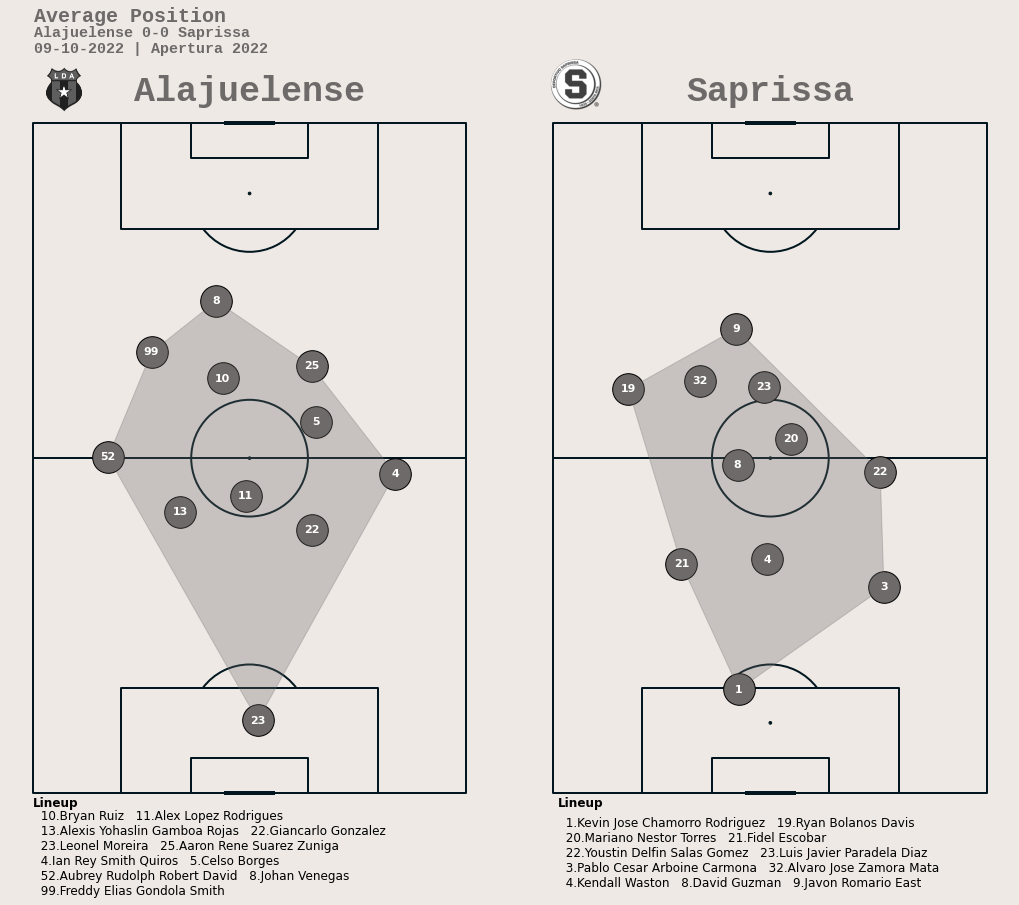

In [37]:
average_positions('Alajuelense-0-0-Deportivo-Saprissa2','Alajuelense','Saprissa')

In [38]:
main_df['Partido'].unique()

array(['Guanacasteca-0-2-Herediano2', 'Alajuelense-2-0-Santos-de-Guapile',
       'Perez-Zeledon-2-0-Deportivo-Saprissa2',
       'Puntarenas-3-0-San-Carlos', 'Cartagines-1-2-Municipal-Grecia',
       'Guadalupe-1-2-Sporting-FC-San-Jose2',
       'Sporting-FC-San-Jose-3-3-Santos-de-Guapiles2',
       'Municipal-Grecia-0-3-Deportivo-Sapriss',
       'Alajuelense-4-1-Guanacasteca2', 'Herediano-1-0-Guadalup',
       'Cartagines-1-3-Puntarenas2', 'San-Carlos-2-1-Perez-Zeledon',
       'Perez-Zeledon-2-3-Municipal-Grecia', 'San-Carlos-1-1-Cartagines2',
       'Herediano-3-0-Alajuelense2', 'Deportivo-Saprissa-1-1-Puntarenas2',
       'Santos-de-Guapiles-3-3-Guadalupe2',
       'Guanacasteca-0-0-Sporting-FC-San-Jose2',
       'Sporting-FC-San-Jose-1-2-Herediano2',
       'Guadalupe-1-3-Alajuelense2', 'Deportivo-Saprissa-1-1-Cartagines2',
       'Puntarenas-1-0-Perez-Zeledo', 'Municipal-Grecia-0-1-San-Carlos',
       'Santos-de-Guapiles-0-1-Guanacasteca',
       'Sporting-FC-San-Jose-2-2-Alaju

In [39]:
'''
cambios_df = main_df.query("Partido == 'Alajuelense-1-1-Sporting-FC2' and Equipos == 'Alajuelense' ")
cambios_df['ID'] = pd.to_numeric(cambios_df['ID'])
ultimas_acciones_jugadores = pysqldf("Select MAX([ID]) ultima_accion, jugador FROM cambios_df GROUP BY jugador ")
primeras_acciones_jugadores = pysqldf("Select MIN([ID]) primera_accion, jugador FROM cambios_df GROUP BY jugador ")
ultimas_acciones_jugadores

titulares = get_lineups(main_df)

titulares = titulares.query("Partido == 'Alajuelense-1-1-Sporting-FC2' and Equipos == 'Alajuelense'")
titulares

estado_titularidad = pysqldf("SELECT A.*, B.jugador as 'titular' FROM cambios_df A LEFT JOIN titulares B ON A.Partido = B.Partido and A.Equipos = B.Equipos and A.jugador = B.jugador")
estado_titularidad2 = pysqldf("SELECT DISTINCT jugador, titular FROM estado_titularidad")

pysqldf("SELECT A.*, B.*, C.* FROM estado_titularidad2 A LEFT JOIN ultimas_acciones_jugadores B ON A.jugador = B.jugador LEFT JOIN primeras_acciones_jugadores C ON A.jugador = C.jugador")
'''

'\ncambios_df = main_df.query("Partido == \'Alajuelense-1-1-Sporting-FC2\' and Equipos == \'Alajuelense\' ")\ncambios_df[\'ID\'] = pd.to_numeric(cambios_df[\'ID\'])\nultimas_acciones_jugadores = pysqldf("Select MAX([ID]) ultima_accion, jugador FROM cambios_df GROUP BY jugador ")\nprimeras_acciones_jugadores = pysqldf("Select MIN([ID]) primera_accion, jugador FROM cambios_df GROUP BY jugador ")\nultimas_acciones_jugadores\n\ntitulares = get_lineups(main_df)\n\ntitulares = titulares.query("Partido == \'Alajuelense-1-1-Sporting-FC2\' and Equipos == \'Alajuelense\'")\ntitulares\n\nestado_titularidad = pysqldf("SELECT A.*, B.jugador as \'titular\' FROM cambios_df A LEFT JOIN titulares B ON A.Partido = B.Partido and A.Equipos = B.Equipos and A.jugador = B.jugador")\nestado_titularidad2 = pysqldf("SELECT DISTINCT jugador, titular FROM estado_titularidad")\n\npysqldf("SELECT A.*, B.*, C.* FROM estado_titularidad2 A LEFT JOIN ultimas_acciones_jugadores B ON A.jugador = B.jugador LEFT JOIN prime

## Testing

In [40]:
main_df['equipo_visita'].unique()

array(['Herediano', 'Santos', 'Saprissa', 'San Carlos', 'Mun. Grecia',
       'Sporting FC', 'Guanacasteca', 'Guadalupe', 'Puntarenas',
       'Perez Zeledon', 'Cartagines', 'Alajuelense'], dtype=object)

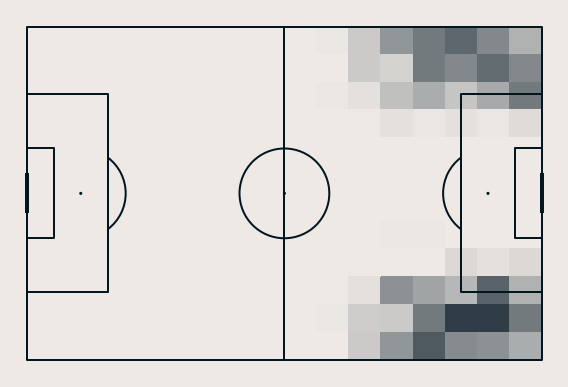

In [41]:
centros_df = main_df.query("Acciones == 'Centros efectivo'")
pitch = Pitch(pitch_type='custom',
                  pitch_length=105,
                  pitch_width=68,
                  line_zorder=2, 
                  line_color='#01161E',
                  pitch_color='None')
fig, ax = pitch.draw(figsize=(8, 14))
fig.set_facecolor("#eee9e5")
bins = (16, 12)
x = pd.to_numeric(centros_df['pos_x'])
y = pd.to_numeric(centros_df['pos_y'])
stats = pitch.bin_statistic(x, y,bins=bins)
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                      ['#eee9e5', '#2f3e46'], N=100)
pitch.heatmap(stats, cmap=pearl_earring_cmap, ax=ax)

In [42]:
radar_df,max_values,min_values = bigTablePlayers(team='Saprissa', player='Ryan Bolanos Davis',metric=['efectividad_centros',
                                                                     'efectividad_entradas',
                                                                     'efectividad_disputas_aereas',
                                                                     'efectividad_pases',
                                                                     'total_pases',
                                                                     'efectividad_regates',
                                                                     'Rechaces',
                                                                     'Interceptaciones'])

metrics_text = radar_df.columns
metrics_text = list(metrics_text)
metrics_values = []
for column in metrics_text:
  metrics_values.append(radar_df[column].values)
  
metrics_values = np.array(metrics_values)
metrics_values = metrics_values.flatten('F')
metrics_values = list(metrics_values)
metrics_values


['Saprissa',
 'Ryan Bolanos Davis',
 0.37142857142857144,
 0.6666666666666666,
 0.7631578947368421,
 0.7971014492753623,
 345.0,
 0.8064516129032258,
 43.0,
 35.0]

In [43]:

metrics_text,metrics_values, max_values, min_values

(['Equipos',
  'jugador',
  'efectividad_centros',
  'efectividad_entradas',
  'efectividad_disputas_aereas',
  'efectividad_pases',
  'total_pases',
  'efectividad_regates',
  'Rechaces',
  'Interceptaciones'],
 ['Saprissa',
  'Ryan Bolanos Davis',
  0.37142857142857144,
  0.6666666666666666,
  0.7631578947368421,
  0.7971014492753623,
  345.0,
  0.8064516129032258,
  43.0,
  35.0],
 [1.0, 1.0, 1.0, 1.0, 914.0, 1.0, 124.0, 136.0],
 [0.18590942625975077,
  0.46847440996445244,
  0.4652331529111813,
  0.7703423748263556,
  222.57514450867052,
  0.5135783971051848,
  34.066473988439306,
  26.898843930635838])

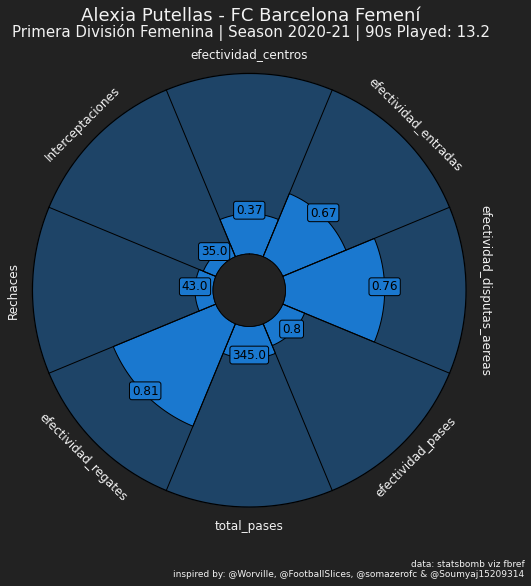

In [44]:
metrics_values, max_values, min_values
metrics_text.pop(0)
metrics_text.pop(0)
metrics_values.pop(0)
metrics_values.pop(0)

metrics_values = [ round(elem, 2) for elem in metrics_values ]
max_values = [ round(elem, 2) for elem in max_values ]
min_values = [ round(elem, 2) for elem in min_values ]





# parameter and value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
params = metrics_text
values = metrics_values

# minimum range value and maximum range value for parameters
min_range = min_values
max_range = max_values

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=20,
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5,
         va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
         zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Alexia Putellas - FC Barcelona Femení", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Primera División Femenina | Season 2020-21 | 90s Played: 13.2",
    size=15,
    ha="center",  color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
     color="#F2F2F2",
    ha="right"
)


plt.show()

## `Pass Cluster`

### Cluster function

In [45]:
def team_clusters(clusters,pass_data=pass_flow_df,team=None):

  from sklearn.cluster import KMeans
  team = team

  # Load team's pass data
  if team != None:
    team_1_passes = pass_data.query("Equipos == @team ")


  # New pass dataframe
  pass_team_1 = pd.DataFrame()
  pass_team_1['start_x'] = team_1_passes.pos_x
  pass_team_1['start_y'] = team_1_passes.pos_y
  pass_team_1['end_x'] = team_1_passes.pos_x_end
  pass_team_1['end_y'] = team_1_passes.pos_y_end
  pass_team_1['player'] = team_1_passes.jugador
  pass_team_1['recipient'] = team_1_passes.jugador_end
  pass_team_1['pass_distance'] = np.sqrt(np.square(pass_team_1['end_x'].astype(float) - pass_team_1['start_x'].astype(float)) + np.square(pass_team_1['end_y'].astype(float) - pass_team_1['start_y'].astype(float)) ) 

  # Cluster definition
  N_clusters = clusters
  X_1 = np.array(pass_team_1[['start_x', 'start_y', 'end_x', 'end_y']])

  kmeans = KMeans(n_clusters = N_clusters, random_state = 0).fit(X_1)
  cluster_labels = kmeans.predict(X_1)
  pass_team_1['n_cluster'] = cluster_labels
  centroids_1 = pd.DataFrame(data = kmeans.cluster_centers_, columns = ['start_x', 'start_y', 'end_x', 'end_y'])

  return pass_team_1, centroids_1

In [46]:
team_clusters(clusters=20, team='Saprissa')

(       start_x start_y end_x end_y                         player  \
 3916      52.5    33.9  25.6  38.9                     Andy Reyes   
 3925      66.7    43.9  92.2  22.9          Mariano Nestor Torres   
 3938      43.9    67.4  10.3  53.7                  Walter Cortes   
 3940      14.8    47.0  15.2  20.2     Aaron Moises Cruz Esquivel   
 3941      15.2    20.2  20.1   6.0    Pablo Cesar Arboine Carmona   
 ...        ...     ...   ...   ...                            ...   
 188531    39.2    41.0  51.2  56.2                 Kendall Waston   
 188532    51.2    56.2  82.2  50.5                  Fidel Escobar   
 188561    21.0    14.3  58.2  10.2   Johel Fabricio Aleman Gaitan   
 188572    22.9    23.7  31.9  25.9                   David Guzman   
 188590     4.8    40.1  64.5  64.7  Kevin Jose Chamorro Rodriguez   
 
                                 recipient  pass_distance  n_cluster  
 3916                         David Guzman      27.360738         14  
 3925           

### Cluster visualization

In [47]:
def team_cluster_visualization(team):
  from mplsoccer.pitch import Pitch
  #from mplsoccer.statsbomb import read_event, EVENT_SLUG
  from matplotlib import rcParams

  # Cluster data
  team_pass_df, team_centroids = team_clusters(clusters=20, team=team)


  # Viz configuration
  pitch = Pitch(pitch_type='custom',
                  axis=False,
                  pitch_length=105,
                  pitch_width=68,
                  line_zorder=2,
                  pitch_color='#eee9e5',
                  line_color='#01161E')
  #bins = (6, 4)
  # plot the 5 * 3 grid
  fig, axs = pitch.grid(nrows=4, ncols=5, figheight=30,
                        endnote_height=0.03, endnote_space=0,
                        axis=False,
                        title_height=0.08, grid_height=0.84)
  fig.set_facecolor('#eee9e5')

  for idx, ax in enumerate(axs['pitch'].flat):
    if idx < len(team_centroids):

      tmp_team_pass_df = team_pass_df.query("n_cluster==@idx")
      tmp_team_centroids = team_centroids.iloc[idx]
      n_passes = len(tmp_team_pass_df)
      distance_avg = round(tmp_team_pass_df["pass_distance"].mean(),1)

      passes = pitch.arrows(tmp_team_pass_df['start_x'].astype(float),  tmp_team_pass_df['start_y'].astype(float),
                  tmp_team_pass_df['end_x'].astype(float), tmp_team_pass_df['end_y'].astype(float),
                  width=3, label='all passes',alpha=0.1,
                  color='#6d6a69', ax=ax)

      clusters = pitch.arrows(tmp_team_centroids['start_x'], tmp_team_centroids['start_y'],
                  tmp_team_centroids['end_x'], tmp_team_centroids['end_y'],
                  width=9,label='cluster',
                  facecolor='#6d6a69', edgecolor='#000000',linewidth = 4, ax=ax)


      #print(teams[idx])
      #team = teams[idx]

      # Detalle del texto de metricas de pases
      annotation_string = (f'Cluster #<{int(idx)}> | '
                        f'passes:<{n_passes}> | '
                        f'avg distance:<{distance_avg}> mts')
                        #f'Efectividad:<{int((efectividad_centros*100))}%>')
  
      # Configuracion para el highlight de los textos de metricas
      highlight_textprops = [{"fontsize":20, "color":'#000000',"fontweight":'bold'},
                          {"fontsize":20, "color":'#000000',"fontweight":'bold'},
                          {"fontsize":20, "color":'#000000',"fontweight":'bold'}]

      #text = f'Cluster #{idx} | passes: {n_passes} | avg distance: {distance_avg} mts'
      ax_text(0, 72, annotation_string , ha='left', va='center',highlight_textprops=highlight_textprops, fontsize=20,ax=ax)

      '''
      # Plot the legend
      ax.legend(facecolor='#ffffff', edgecolor='None', fontsize=10, loc='upper left', handlelength=4)
      # Set the title
      ax.set_title(f'20 principales pases', fontsize=30)
      # Set the figure facecolor
      fig.set_facecolor('#eee9e5')
      '''
      
      


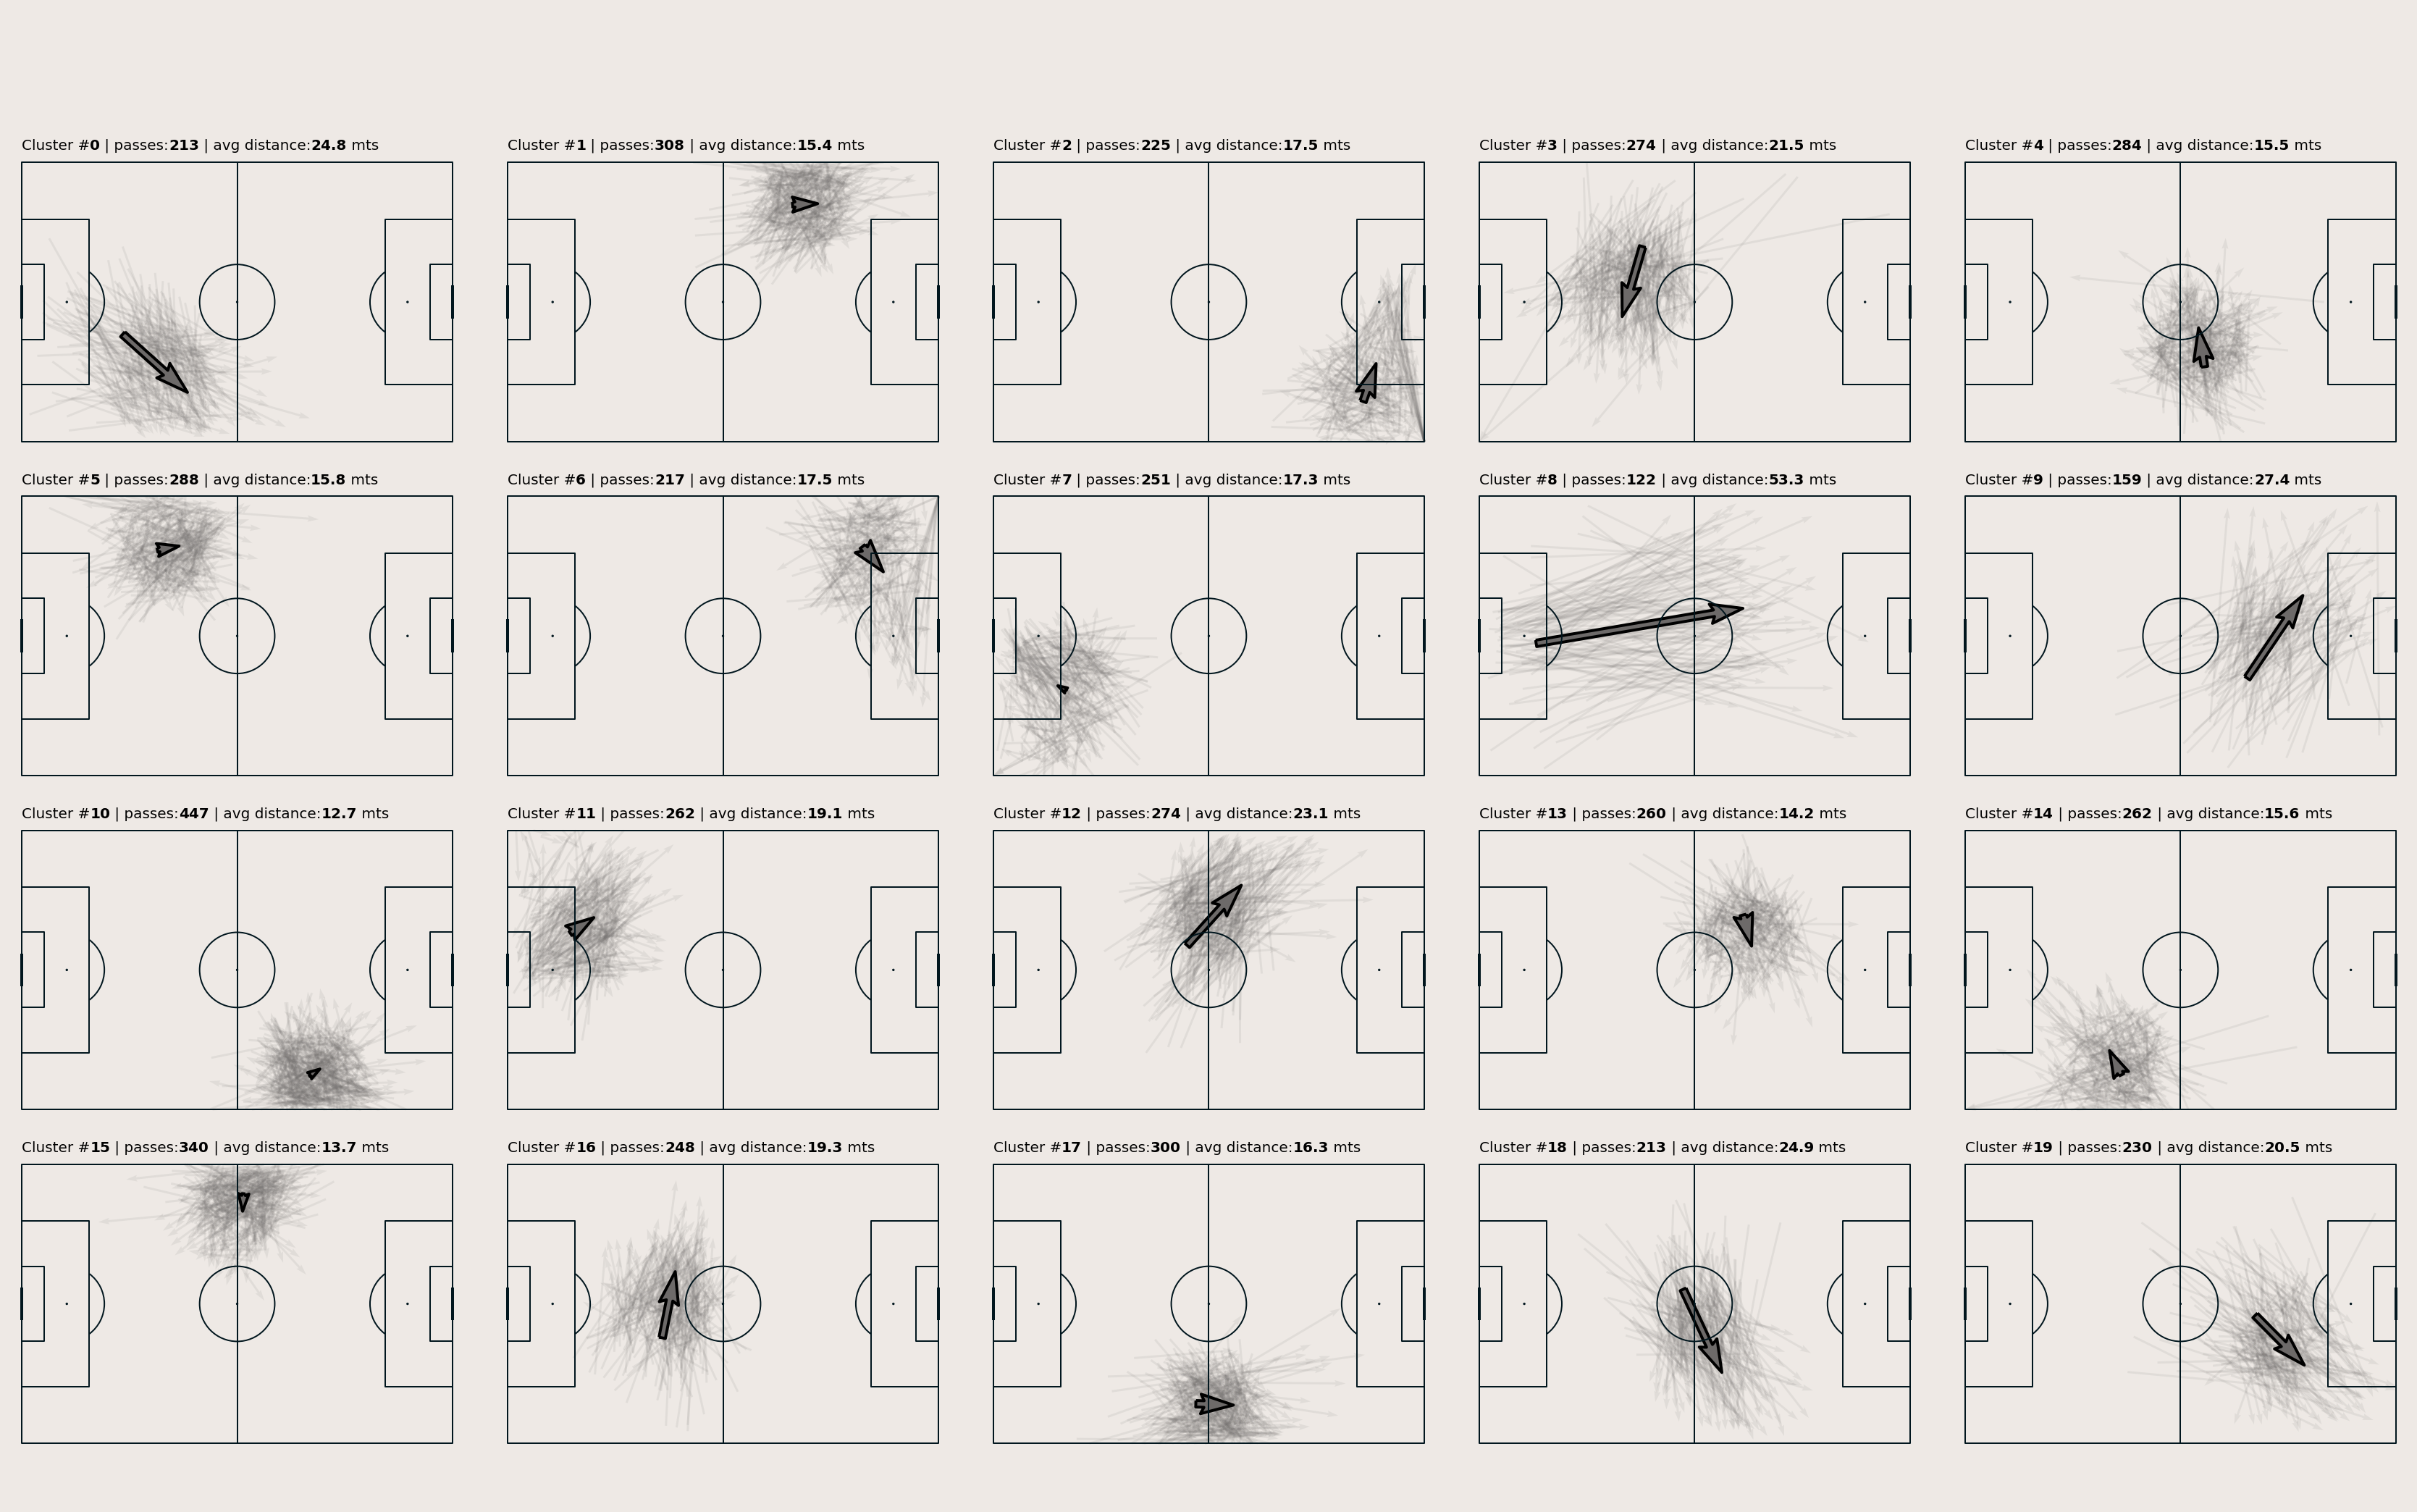

In [48]:
team_cluster_visualization('Alajuelense')

In [49]:
from mplsoccer import Pitch
pitch = Pitch()
pitch.calculate_angle_and_distance(0, 40, 30, 20, degrees=True)


(array([326.30993247]), array([36.05551275]))

In [50]:




  team_1_passes = pass_flow_df.query("Equipos == 'Saprissa' ") #and Partido == 'Puntarenas-1-0-Perez-Zeledo'
  team_2_passes = pass_flow_df.query("Equipos == 'San Carlos' ")


  pass_team_1 = pd.DataFrame()
  pass_team_1['start_x'] = team_1_passes.pos_x
  pass_team_1['start_y'] = team_1_passes.pos_y
  pass_team_1['end_x'] = team_1_passes.pos_x_end
  pass_team_1['end_y'] = team_1_passes.pos_y_end
  pass_team_1['player'] = team_1_passes.jugador
  pass_team_1['recipient'] = team_1_passes.jugador_end


  pass_team_2 = pd.DataFrame()
  pass_team_2['start_x'] = team_2_passes.pos_x
  pass_team_2['start_y'] = team_2_passes.pos_y
  pass_team_2['end_x'] = team_2_passes.pos_x_end
  pass_team_2['end_y'] = team_2_passes.pos_y_end
  pass_team_2['player'] = team_2_passes.jugador
  pass_team_2['recipient'] = team_2_passes.jugador_end

  ### Clusters

  N_clusters = 20
  X_1 = np.array(pass_team_1[['start_x', 'start_y', 'end_x', 'end_y']])
  X_2 = np.array(pass_team_2[['start_x', 'start_y', 'end_x', 'end_y']])

  kmeans = KMeans(n_clusters = N_clusters, random_state = 0).fit(X_1)
  cluster_labels = kmeans.predict(X_1)
  pass_team_1['n_cluster'] = cluster_labels
  centroids_1 = pd.DataFrame(data = kmeans.cluster_centers_, columns = ['start_x', 'start_y', 'end_x', 'end_y'])

  kmeans = KMeans(n_clusters = N_clusters, random_state = 0).fit(X_2)
  cluster_labels = kmeans.predict(X_2)
  pass_team_2['n_cluster'] = cluster_labels
  centroids_2 = pd.DataFrame(data = kmeans.cluster_centers_, columns = ['start_x', 'start_y', 'end_x', 'end_y'])

  #### Viz

  from mplsoccer.pitch import Pitch
  #from mplsoccer.statsbomb import read_event, EVENT_SLUG
  from matplotlib import rcParams

  pitch = VerticalPitch(pitch_type='custom',
                  pitch_length=105,
                  pitch_width=68,
                  pitch_color='#eee9e5',
                  line_zorder=2, 
                  line_color='#01161E')
  fig, ax = pitch.draw(figsize=(12, 28))
  fig.set_facecolor("#eee9e5")





  passes_1 = pitch.arrows(pass_team_1['start_x'].astype(float),  pass_team_1['start_y'].astype(float),
                    pass_team_1['end_x'].astype(float), pass_team_1['end_y'].astype(float),
                    width=3, label='all passes',alpha=0.1,
                    color='#6d6a69', ax=ax)

  lc3 = pitch.arrows(centroids_1['start_x'], centroids_1['start_y'],
                    centroids_1['end_x'], centroids_1['end_y'],
                    width=9,label='cluster',
                    facecolor='#6d6a69', edgecolor='#000000',linewidth = 4, ax=ax)


  '''
  lc2 = pitch.lines(centroids_2['start_x'], centroids_2['start_y'],
                    centroids_2['end_x'], centroids_2['end_y'],
                    lw=5, transparent=False, comet=True, label='San Carlos passes',
                    color='#ba4f45', ax=ax)
  '''

  # Plot the legend
  ax.legend(facecolor='#ffffff', edgecolor='None', fontsize=10, loc='upper left', handlelength=4)
  # Set the title
  ax.set_title(f'20 principales pases', fontsize=30)
  # Set the figure facecolor
  fig.set_facecolor('#eee9e5')

NameError: ignored

## `Zona de tiros`

### Funcion

In [70]:

def team_shot_location(team=None,game=None):

  from mplsoccer import Pitch
  import numpy as np

  ## Variables
  team = team
  game=game

  if team != None and game == None:

    shots = main_df.query("Acciones in ('Tiros','Goles') and Equipos == @team   ")
    shots['shot_distance'] = np.sqrt(np.square(105 - shots['pos_x'].astype(float)) + 34 - shots['pos_y'].astype(float)) 

    goals = main_df.query("Acciones in ('Goles') and Equipos == @team    ")
    goals['goals_distance'] = np.sqrt(np.square(105 - goals['pos_x'].astype(float)) + 34 - goals['pos_y'].astype(float)) 
  elif team != None and game != None:
    shots = main_df.query("Acciones in ('Tiros','Goles') and Equipos == @team and Partido == @game  ")
    shots['shot_distance'] = np.sqrt(np.square(105 - shots['pos_x'].astype(float)) + 34 - shots['pos_y'].astype(float)) 

    goals = main_df.query("Acciones in ('Goles') and Equipos == @team and Partido == @game    ")
    goals['goals_distance'] = np.sqrt(np.square(105 - goals['pos_x'].astype(float)) + 34 - goals['pos_y'].astype(float)) 

  on_target = bigTableTeams(team=team,metric=['efectividad_tiros'])
  on_target = round(on_target.iloc[0]['efectividad_tiros']*100)
  
  # Setup the pitch
  pitch = VerticalPitch(pitch_type='custom',
                        half=True,
                        pitch_length=105,
                        pitch_width=68,
                        pitch_color='#eee9e5',
                        line_zorder=2, 
                        line_color='#01161E')
  fig, ax = pitch.draw(figsize=(8,14))
  fig.set_facecolor("#eee9e5")
  pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                        ['#eee9e5', '#2B3D41'], N=100) #2f3e46, #605C4E,#1B9AAA,#AF125A,#6d6a69,#00A7E1,#2B3D41
  
  # Shots location convertion
  x = shots['pos_x'].astype(float)
  y = shots['pos_y'].astype(float)

  
  ### --- Shots heatmap
  hb = pitch.hexbin(x, y, edgecolors=None, gridsize=(24,24), cmap=pearl_earring_cmap, ax=ax)

  ### --- Goal location convertion
  x_goal = goals['pos_x'].astype(float)
  y_goal = goals['pos_y'].astype(float)

  '''
  ### --- Goals locations
  pitch.scatter(x, y, 
                edgecolors='black',
                linewidth=0.6,
                c='white',
                s=100,
                marker='o',
                #color='#6d6a69',
                #alpha=0.5,
                ax=ax)
  '''

  ### --- Goals annotation --- ###
  # Goals text figure
  pitch.scatter(65, 50, 
                marker='p',
                facecolor='#eee9e5',
                edgecolor='#000000',
                #alpha=0.5,
                s=3000,
                linewidth = 2,
                ax=ax)

  # Goals text
  pitch.annotate(text=len(goals), xytext=(65, 50), xy=(65, 50), 
                ha='center', 
                va='center',
                size=15,
                color='#000000',
                fontweight='bold',
                ax=ax)

  pitch.annotate(text='Goals', xytext=(60, 50), xy=(60, 50), 
                ha='center', 
                va='center',
                size=15,
                color='#000000',
                #fontweight='bold',
                ax=ax)


  ### --- Shots annotation --- ###
  # Shots text figure
  pitch.scatter(65, 40, 
                marker='p',
                facecolor='#eee9e5',
                edgecolor='#000000',
                #alpha=0.5,
                s=3000,
                linewidth = 2,
                ax=ax)

  # Shots text
  pitch.annotate(text=len(shots), xytext=(65, 40), xy=(65, 40), 
                ha='center', 
                va='center',
                size=15,
                color='#000000',
                fontweight='bold',
                ax=ax)

  pitch.annotate(text='Shots', xytext=(60, 40), xy=(60, 40), 
                ha='center', 
                va='center',
                size=15,
                color='#000000',
                #fontweight='bold',
                ax=ax)


  ### --- Shots distance annotation --- ###
  # Shots distance text figure
  pitch.scatter(65, 28, 
                marker='p',
                facecolor='#eee9e5',
                edgecolor='#000000',
                #alpha=0.5,
                s=3000,
                linewidth = 2,
                ax=ax)

  # Shots distance value
  pitch.annotate(text=round(shots['shot_distance'].mean(),1), xytext=(65, 28), xy=(65, 28), 
                ha='center', 
                va='center',
                size=15,
                color='#000000',
                fontweight='bold',
                ax=ax)

  pitch.annotate(text='Avg. Dist', xytext=(60, 28), xy=(60, 28), 
                ha='center', 
                va='center',
                size=15,
                color='#000000',
                #fontweight='bold',
                ax=ax)
  
  ### --- Shots ON TARGET annotation --- ###
  # Shots ON TARGET text figure
  pitch.scatter(65, 18, 
                marker='p',
                facecolor='#eee9e5',
                edgecolor='#000000',
                #alpha=0.5,
                s=3000,
                linewidth = 2,
                ax=ax)

  # Shots ON TARGET value
  pitch.annotate(text=on_target, xytext=(65, 18), xy=(65, 18), 
                ha='center', 
                va='center',
                size=15,
                color='#000000',
                fontweight='bold',
                ax=ax)

  pitch.annotate(text='On\n Target (%)', xytext=(59, 18), xy=(59, 18), 
                ha='center', 
                va='center',
                size=13,
                color='#000000',
                #fontweight='bold',
                ax=ax)

  # Ubicacion del nombre del jugador como titulo
  ax.text(34, 111,team, 
                size=25,
                #fontproperties = fontprop,
                #fontname = 'Oswald',
                fontweight = 'bold',
                horizontalalignment='center', va='center', color='#6d6a69')
  
  ax.text(34, 108,'Zona frecuente de tiros', 
                size=15,
                #fontproperties = fontprop,
                #fontname = 'Oswald',
                #fontweight = 'bold',
                horizontalalignment='center', va='center', color='#6d6a69')
  

  
  image_home, _ = set_logos(team,team)

  ax_home_logo = add_image(image_home, fig,
                        left=0.07,
                        bottom=0.45,
                        height=0.07)
  
  # Plot the legend
  #ax.legend(facecolor='#000000', edgecolor='#000000', fontsize=10, loc='best', handlelength=8)
  #ax.legend()
  # Set the title
  #ax.set_title(f'20 principales pases', fontsize=30)
  # Set the figure facecolor
  fig.set_facecolor('#eee9e5')

  fig.colorbar(hb, ax = ax, orientation = 'horizontal',fraction=0.046*0.1,pad=0.01)
  
  



### Example

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


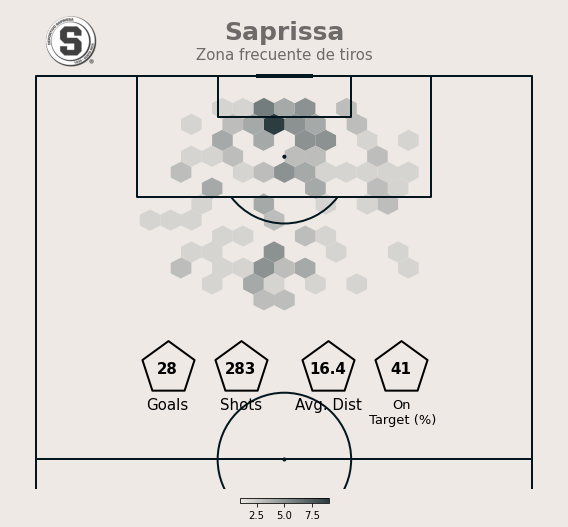

In [71]:
team_shot_location('Saprissa',None)

## `Player card`

### Function | Card Passes

In [ ]:
def player_card_passes(player,team):
  #IMAGE_URL = '/content/background.png'
  #image = Image.open((IMAGE_URL))

  #temp_pass_data = main_df.query("Acciones == 'Tiros'")
  player = player
  team = team
  temp_pass_data = pass_flow_df.query("jugador == @player ")
  pitch = Pitch(pitch_type='custom',
                  pitch_length=105,
                  pitch_width=68,
                  line_zorder=2, 
                  line_color='#01161E',
                  pitch_color='None')
  fig, ax = pitch.draw(figsize=(12, 10),tight_layout=False)
  fig.set_facecolor("#eee9e5")
  bins = (16, 12)
  player_face = player_images(team,player)
  x = pd.to_numeric(temp_pass_data['pos_x'])
  y = pd.to_numeric(temp_pass_data['pos_y'])
  stats = pitch.bin_statistic(x, y,bins=bins)
  pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                        ['#eee9e5', '#2f3e46'], N=100)
  
  # Aditional stats
  player_df,_,_ = bigTablePlayers(team=team, player=player,metric=['Asistencias',
                                                                     'Goles',
                                                                     'efectividad_pases',
                                                                     'total_pases',
                                                                     'efectividad_regates'])
  # Variables con las metricas
  asistencias = player_df['Asistencias'].values[0]
  efectividad_pases = player_df['efectividad_pases'].values[0]
  total_pases = player_df['total_pases'].values[0]
  metrics_names = player_df.columns

  # Detalle del texto de metricas de pases
  annotation_string = (f'Total:<{int(total_pases)}> | '
                       f'Asistencias:<{int(asistencias)}> | '
                             f'Efectividad:<{int((efectividad_pases*100))}%>')
  
  # Configuracion para el highlight de los textos de metricas
  highlight_textprops = [{"fontsize":15, "color":'#FB4D3D',"fontweight":'bold'},
                       {"fontsize":15, "color":'#FB4D3D',"fontweight":'bold'},
                       {"fontsize":15, "color":'#FB4D3D',"fontweight":'bold'}]

  # Ubicacion del texto con detalle de metricas
  ax_text(8, 70, annotation_string, ha='left', va='center', fontsize=15,
          highlight_textprops=highlight_textprops,
                #fontproperties=fm_scada.prop,  # using the fontmanager for the google font
                ax=ax)
  # Ubicacion del nombre del jugador como titulo
  ax.text(52, 85,player, 
                size=25,
                #fontproperties = fontprop,
                #fontname = 'Oswald',
                fontweight = 'bold',
                horizontalalignment='center', va='center', color='#6d6a69')
  
  # Texto del subtitulo
  subtitle_text = (team+'\n'
            'Ubicación de Pases Efectivos')
  
  # Ubicacion del subtitulo
  ax.text(52, 80,subtitle_text, 
                size=12,
                #fontproperties = fontprop,
                #fontname = 'Oswald',
                horizontalalignment='center', va='center', color='#6d6a69')
  
  # Imagen del jugador 
  try:
    player_image = add_image(player_face, fig,
                          left=0.14,
                          bottom=0.79,
                          height=0.08)
  except: 
    pass

  pitch.heatmap(stats, cmap=pearl_earring_cmap, ax=ax)

### Function | Laterales

In [ ]:
def player_card_laterales(player,team):
  #IMAGE_URL = '/content/background.png'
  #image = Image.open((IMAGE_URL))

  #temp_pass_data = main_df.query("Acciones == 'Tiros'")
  player = player
  team = team
  temp_pass_data = pass_flow_df.query("jugador == @player ")
  pitch = Pitch(pitch_type='custom',
                  pitch_length=105,
                  pitch_width=68,
                  line_zorder=2, 
                  line_color='#01161E',
                  pitch_color='None')
  fig, ax = pitch.draw(figsize=(12, 10),tight_layout=False)
  fig.set_facecolor("#eee9e5")
  bins = (16, 12)
  player_face = player_images(team,player)
  x = pd.to_numeric(temp_pass_data['pos_x'])
  y = pd.to_numeric(temp_pass_data['pos_y'])
  stats = pitch.bin_statistic(x, y,bins=bins)
  pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                        ['#eee9e5', '#2f3e46'], N=100)
  
  # Aditional stats
  player_df,_,_ = bigTablePlayers(team=team, player=player,metric=['Asistencias',
                                                                     'total_centros',
                                                                     'efectividad_pases',
                                                                     'efectividad_centros',
                                                                     'total_pases',
                                                                     'efectividad_disputas_aereas'])
  # Variables con las metricas
  asistencias = player_df['Asistencias'].values[0]
  efectividad_pases = player_df['efectividad_pases'].values[0]
  total_pases = player_df['total_pases'].values[0]
  efectividad_centros = player_df['efectividad_centros'].values[0]
  centros = player_df['total_centros'].values[0]
  metrics_names = player_df.columns

  # Detalle del texto de metricas de pases
  annotation_string = (f'Pases:<{int(total_pases)}> | '
                       f'Efectividad:<{int((efectividad_pases*100))}%> | '
                       f'Asistencias:<{int(asistencias)}> | '
                       f'Centros:<{int(centros)}> | '
                       f'Efectividad:<{int((efectividad_centros*100))}%>')
  
  # Configuracion para el highlight de los textos de metricas
  highlight_textprops = [{"fontsize":15, "color":'#FB4D3D',"fontweight":'bold'},
                       {"fontsize":15, "color":'#FB4D3D',"fontweight":'bold'},
                       {"fontsize":15, "color":'#FB4D3D',"fontweight":'bold'},
                       {"fontsize":15, "color":'#FB4D3D',"fontweight":'bold'},
                       {"fontsize":15, "color":'#FB4D3D',"fontweight":'bold'}]

  # Ubicacion del texto con detalle de metricas
  ax_text(8, 70, annotation_string, ha='left', va='center', fontsize=15,
          highlight_textprops=highlight_textprops,
                #fontproperties=fm_scada.prop,  # using the fontmanager for the google font
                ax=ax)
  # Ubicacion del nombre del jugador como titulo
  ax.text(52, 85,player, 
                size=25,
                #fontproperties = fontprop,
                #fontname = 'Oswald',
                fontweight = 'bold',
                horizontalalignment='center', va='center', color='#6d6a69')
  
  # Texto del subtitulo
  subtitle_text = (team+'\n'
            'Lateral')
  
  # Ubicacion del subtitulo
  ax.text(52, 80,subtitle_text, 
                size=12,
                #fontproperties = fontprop,
                #fontname = 'Oswald',
                horizontalalignment='center', va='center', color='#6d6a69')
  
  # Imagen del jugador 
  player_image = add_image(player_face, fig,
                          left=0.14,
                          bottom=0.79,
                          height=0.08)
 

  pitch.heatmap(stats, cmap=pearl_earring_cmap, ax=ax)

### Example

In [ ]:
main_df['jugador'].unique()

In [ ]:
player_card_passes('Javon Romario East','Saprissa')

## `Pass Flow Chart | Teams`

### Function

In [ ]:
def pass_flow_team(data,team):
  team = team
  team_pass_flow_df = data.query("Equipos == @team")
  team_pass_flow_df['pos_x'] = pd.to_numeric(data['pos_x'])
  team_pass_flow_df['pos_x_end'] = pd.to_numeric(data['pos_x_end'])
  team_pass_flow_df['pos_y'] = pd.to_numeric(data['pos_y'])
  team_pass_flow_df['pos_y_end'] = pd.to_numeric(data['pos_y_end'])

  pitch = Pitch(pitch_type='custom',
                axis=False,
                pitch_length=105,
                pitch_width=68,
                line_zorder=2,
                pitch_color='#eee9e5',
                line_color='#01161E')
  bins = (6, 4)
  fig, ax = pitch.draw(figsize=(14, 11), constrained_layout=True, tight_layout=False)
  fig.set_facecolor('#eee9e5')

  # plot the heatmap - darker colors = more passes originating from that square
  bs_heatmap = pitch.bin_statistic(team_pass_flow_df.pos_x, 
                                  team_pass_flow_df.pos_y, 
                                  statistic='count', 
                                  bins=bins)
  pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                        ['#eee9e5', '#2f3e46'], N=100)
  hm = pitch.heatmap(bs_heatmap, ax=ax, cmap=pearl_earring_cmap)

  # plot the pass flow map with a single color ('black') and length of the arrow (5)
  fm = pitch.flow(team_pass_flow_df.pos_x, team_pass_flow_df.pos_y, team_pass_flow_df.pos_x_end, team_pass_flow_df.pos_y_end,
                  color='black', arrow_type='scale',
                  arrow_length=5, bins=bins, ax=ax)
  ax_title = ax.set_title(f'{team}', pad=-20,color='#6d6a69',fontproperties = fontprop ,fontweight = 'bold',fontsize=25)

  image_home, _ = set_logos(team,team)

  ax_home_logo = add_image(image_home, fig,
                        left=0.33,
                        bottom=0.88,
                        height=0.06)


  

### Example

In [ ]:
pass_flow_team(pass_flow_df,'Saprissa')

## `Pass Flow Map | Player`

### **Funcion**

In [ ]:
def pass_flow_player(data,player):
  jugador = player
  team_pass_flow_df = data.query("jugador == @jugador")
  team_pass_flow_df['pos_x'] = pd.to_numeric(data['pos_x'])
  team_pass_flow_df['pos_x_end'] = pd.to_numeric(data['pos_x_end'])
  team_pass_flow_df['pos_y'] = pd.to_numeric(data['pos_y'])
  team_pass_flow_df['pos_y_end'] = pd.to_numeric(data['pos_y_end'])

  pitch = Pitch(pitch_type='custom',
                axis=False,
                pitch_length=105,
                pitch_width=68,
                line_zorder=2,
                pitch_color='#eee9e5',
                line_color='#01161E')
  bins = (6, 4)
  fig, ax = pitch.draw(figsize=(14, 11), constrained_layout=True, tight_layout=False)
  fig.set_facecolor('#eee9e5')

  # plot the heatmap - darker colors = more passes originating from that square
  bs_heatmap = pitch.bin_statistic(team_pass_flow_df.pos_x, 
                                  team_pass_flow_df.pos_y, 
                                  statistic='count', 
                                  bins=bins)
  pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                        ['#eee9e5', '#2f3e46'], N=100)
  hm = pitch.heatmap(bs_heatmap, ax=ax, cmap=pearl_earring_cmap)

  # plot the pass flow map with a single color ('black') and length of the arrow (5)
  fm = pitch.flow(team_pass_flow_df.pos_x, team_pass_flow_df.pos_y, team_pass_flow_df.pos_x_end, team_pass_flow_df.pos_y_end,
                  color='black', 
                  arrow_type='scale',
                  bins=bins, ax=ax)
  
  ax_title = ax.set_title(f'{jugador}', 
                          pad=-20,color='#6d6a69',
                          fontproperties = fontprop ,
                          fontweight = 'bold',
                          fontsize=25)

  '''
  image_home, _ = set_logos(team,team)

  ax_home_logo = add_image(image_home, fig,
                        left=0.33,
                        bottom=0.88,
                        height=0.06)
  '''


  

### **Example**

In [ ]:
pass_flow_player(pass_flow_df,'Ryan Bolanos Davis')

## `Pass Flow Map | All Teams`

### Function

In [ ]:
def pass_flow_all_teams():
  # filtering out some highlight_text warnings - the warnings aren't correct as the
  # text fits inside the axes.
  warnings.simplefilter("ignore", UserWarning)

  teams = main_df['Equipos'].unique()

  pitch = Pitch(pitch_type='custom',
                  axis=False,
                  pitch_length=105,
                  pitch_width=68,
                  line_zorder=2,
                  pitch_color='#eee9e5',
                  line_color='#01161E')
  bins = (6, 4)
  # plot the 5 * 3 grid
  fig, axs = pitch.grid(nrows=4, ncols=3, figheight=30,
                        endnote_height=0.03, endnote_space=0,
                        axis=False,
                        title_height=0.08, grid_height=0.84)
  fig.set_facecolor('#eee9e5')

  for idx, ax in enumerate(axs['pitch'].flat):
    if idx < 12:
      #print(teams[idx])
      team = teams[idx]
      ax_text(0, 72, teams[idx], ha='left', va='center',fontweight = 'bold', fontsize=20,ax=ax)
      pass_df = pass_flow_df.query("Equipos == @team")
      pass_df['pos_x'] = pd.to_numeric(pass_df['pos_x'])
      pass_df['pos_x_end'] = pd.to_numeric(pass_df['pos_x_end'])
      pass_df['pos_y'] = pd.to_numeric(pass_df['pos_y'])
      pass_df['pos_y_end'] = pd.to_numeric(pass_df['pos_y_end'])
      
      # plot the heatmap - darker colors = more passes originating from that square
      bs_heatmap = pitch.bin_statistic(pass_df.pos_x, 
                                      pass_df.pos_y, 
                                      statistic='count', 
                                      bins=bins)
      pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                            ['#eee9e5', '#2f3e46'], N=100)
      hm = pitch.heatmap(bs_heatmap, ax=ax, cmap=pearl_earring_cmap)

      # plot the pass flow map with a single color ('black') and length of the arrow (5)
      fm = pitch.flow(pass_df.pos_x, pass_df.pos_y, pass_df.pos_x_end, pass_df.pos_y_end,
                      color='black', arrow_type='same',
                      arrow_length=5, bins=bins, ax=ax)
      
      
  ######### TITLE SECTION #########
  axs['title'].text(0.5, 0.5, 
                    'Pass Flow Maps | Torneo Apertura 2022',
                    ha='center', 
                    va='center', 
                    fontsize=70, 
                    color='#6d6a69',
                    fontweight = 'bold')
  

    




### Example

In [ ]:
pass_flow_all_teams()


## `Mapa de recuperaciones`

### Funcion

In [ ]:
recuperaciones_df = pd.DataFrame()
perdidas_df = pd.DataFrame()
equipos = main_df['Equipos'].unique()
partidos = main_df['Partido'].unique()
for equipo in equipos:
  temp_df = main_df.query("Equipos == @equipo")
  temp_perdidas_df = temp_df.query("Acciones == 'Perdidas' ")
  perdidas_df = perdidas_df.append(temp_perdidas_df)
  temp_df = main_df.query("Equipos != @equipo")
  temp_recuperaciones_df = temp_df.query("Acciones == 'Perdidas' and rival == @equipo ")
  recuperaciones_df = recuperaciones_df.append(temp_recuperaciones_df)
  #print(len(temp_df),len(perdidas_df),len(recuperaciones_df), equipo)

In [ ]:
def recuperaciones_chart(data,team):
  team = team
  data_df = data.query("rival == @team")
  pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#eee9e5', '#2f3e46'], N=100)

  path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),path_effects.Normal()]



  pitch = VerticalPitch(pitch_type='custom',
                        axis=False,
                        pitch_length=105,
                        pitch_width=68, 
                        line_zorder=2, 
                        pitch_color='#eee9e5',
                        line_color='#01161E')
  fig, axs = pitch.grid(endnote_height=0.03, 
                        endnote_space=0,
                        title_height=0.08, 
                        title_space=0,
                        figheight=14,
                        # Turn off the endnote/title axis. I usually do this after
                        # I am happy with the chart layout and text placement
                        axis=False,
                        grid_height=0.84)
  fig.set_facecolor('#eee9e5')

  # heatmap and labels
  bin_statistic = pitch.bin_statistic_positional(data_df.pos_x, 
                                                 data_df.pos_y, statistic='count',
                                                 positional='full', normalize=True)
  pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                          cmap=pearl_earring_cmap, edgecolors='#22312b')
  labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                              ax=axs['pitch'], ha='center', va='center',
                              str_format='{:.0%}',fontweight = 'bold',path_effects=path_eff)

  # endnote and title
  axs['endnote'].text(1, 0.5, 'xxx', va='center', ha='right', fontsize=15,
                      color='#dee6ea')
  axs['title'].text(0.5, 0.5, "Zonas de Recuperación de balón \n {}".format(team), color='#6d6a69',
                    va='center', ha='center',fontproperties = fontprop ,fontweight = 'bold',fontsize=25)



  # sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_heatmap_positional_002.png'

  axs["pitch"].invert_yaxis()

  pitch.arrows(105, -2,
              95, -2, width=2, headwidth=10,
              headlength=10, color='red', ax=axs['pitch'])


### Example

In [ ]:
recuperaciones_chart(recuperaciones_df,"Saprissa")

## `Mapa de perdidas`

### Funcion

In [ ]:
def perdidas_chart(data,team):
  team = team
  data_df = data.query("Equipos == @team")

  pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                        ['#eee9e5', '#2f3e46'], N=100)

  path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
              path_effects.Normal()]


  pitch = VerticalPitch(pitch_type='custom',
                        axis=False,
                        pitch_length=105,
                        pitch_width=68, 
                        line_zorder=2, 
                        pitch_color='#eee9e5',
                        line_color='#01161E')


  fig, axs = pitch.grid(endnote_height=0.03, 
                        endnote_space=0,
                        title_height=0.08, 
                        title_space=0,
                        figheight=14,
                        # Turn off the endnote/title axis. I usually do this after
                        # I am happy with the chart layout and text placement
                        axis=False,
                        grid_height=0.84)
  fig.set_facecolor('#eee9e5')

  # heatmap and labels
  bin_statistic = pitch.bin_statistic_positional(data_df.pos_x, data_df.pos_y, statistic='count',
                                                positional='full', normalize=True)
  pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                          cmap=pearl_earring_cmap, edgecolors='#22312b')
  labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                              ax=axs['pitch'], ha='center', va='center',
                              str_format='{:.0%}', path_effects=path_eff,fontweight = 'bold')

  # endnote and title
  axs['endnote'].text(1, 0.5, '', va='center', ha='right', fontsize=15,
                      color='#dee6ea')
  axs['title'].text(0.5, 0.5, "Zonas de Pérdida de balón \n {}".format(team), color='#6d6a69',
                      va='center', ha='center',fontproperties = fontprop ,fontweight = 'bold',fontsize=25)

  pitch.arrows(5, -2,
              15, -2, width=2, headwidth=10,
              headlength=10, color='red', ax=axs['pitch'])



### Example

In [ ]:
perdidas_chart(perdidas_df,'Saprissa')

In [ ]:
recuperaciones_df